# Setup Env

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
import os
import pickle
import copy
from pandas.plotting import scatter_matrix


In [ ]:
class label_encoder(object):
    def fit_pd(self,df,cols=[]):
        if len(cols) == 0:
            cols = df.columns
        self.class_index = {}
        for f in cols:
            uf = df[f].unique()
            self.class_index[f] = {}
            index = 1
            for item in uf:
                self.class_index[f][item] = index
                index += 1

    def fit_transform_pd(self,df,cols=[]):
        if len(cols) == 0:
            cols = df.columns
        newdf = copy.deepcopy(df)
        self.class_index = {}
        for f in cols:
            uf = df[f].unique()
            self.class_index[f] = {}
            index = 1
            for item in uf:
                self.class_index[f][item] = index
                index += 1

            newdf[f] = df[f].apply(lambda d: self.update_label(f,d))
        return newdf

    def transform_pd(self,df,cols=[]):
        newdf = copy.deepcopy(df)
        if len(cols) == 0:
            cols = df.columns
        for f in cols:
            if f in self.class_index:
                newdf[f] = df[f].apply(lambda d: self.update_label(f,d))
        return newdf

    def update_label(self,f,x):
        try:
            return self.class_index[f][x]
        except:
            self.class_index[f][x] = max(self.class_index[f].values())+1
            return self.class_index[f][x]

In [ ]:
def min_max_scaler(df, numerical_columns, scaler_path):
    df = df.loc[:, numerical_columns].copy()
    scalers = {}
    mm_sclaers = []

    if not os.path.exists(scaler_path):
        print('Make a New Min Max Scaler')


        for col in numerical_columns:
            mm_sclaer = MinMaxScaler()


            mm_sclaer.fit(df.loc[:, [col]])
            mm_sclaers.append(mm_sclaer)


            df.loc[:, col] = mm_sclaer.transform(df.loc[:, [col]])
            scalers[col] = mm_sclaer
        f = open(scaler_path, 'wb')
        pickle.dump(scalers, f)

    else:
        print('Normalize with existing Min Max Scaler')
        f = open(scaler_path, 'rb')
        scalers = pickle.load(f)

        for col in numerical_columns:
            mm_scaler = scalers[col]
            df.loc[:, col] = mm_scaler.transform(df.loc[:, [col]])

    return df, scalers

## 1. Read the Dataset

In [ ]:
df_test = pd.read_csv("valid.csv")
df_train = pd.read_csv("train.csv")


In [ ]:
df_train.head()

,Declaration ID,Date,Office ID,Process Type,Import Type,Import Use,Payment Type,Mode of Transport,Declarant ID,Importer ID,Seller ID,Courier ID,HS6 Code,Country of Departure,Country of Origin,Tax Rate,Tax Type,Country of Origin Indicator,Net Mass,Item Price,Fraud,Critical Fraud
0,97061800,2020-01-01,30,B,11,21,11,10,ZZR1LT6,QLRUBN9,0VKY2BR,NaN,440890,BE,BE,0.0,FEU1,G,108.0,372254.40,0,0
1,85945189,2020-01-01,40,B,11,21,11,40,SWF9S4X,7JD1S2X,8WDKMC6,NaN,690722,CN,CN,8.0,A,Y,11352.0,375751.20,0,0
2,77854751,2020-01-01,20,B,11,21,11,40,X4XT6P8,WI9O3I5,4DT3246,NaN,620822,CN,CN,5.2,FCN1,B,20.7,5353.02,0,0
3,46925060,2020-01-01,40,B,11,21,43,40,K7LCQTZ,6LI9721,PKUOG2P,NaN,940350,VN,VN,0.0,C,Y,9218.0,1477645.40,0,0
4,34131149,2020-01-01,20,B,11,21,11,10,1HMVIVH,RZ871V1,NaN,NaN,71080,VN,VN,27.0,A,B,24000.0,6364800.00,0,0


# 2. Exploratory Data Analysis (EDA)

In [ ]:
df_train.shape

(100847, 22)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100847 entries, 0 to 100846
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Declaration ID               100847 non-null  int64  
 1   Date                         100847 non-null  object 
 2   Office ID                    100847 non-null  int64  
 3   Process Type                 100847 non-null  object 
 4   Import Type                  100847 non-null  int64  
 5   Import Use                   100847 non-null  int64  
 6   Payment Type                 100847 non-null  int64  
 7   Mode of Transport            100847 non-null  int64  
 8   Declarant ID                 100847 non-null  object 
 9   Importer ID                  100847 non-null  object 
 10  Seller ID                    91774 non-null   object 
 11  Courier ID                   20239 non-null   object 
 12  HS6 Code                     100847 non-null  int64  
 13 

In [ ]:
df_train.describe()

,Declaration ID,Office ID,Import Type,Import Use,Payment Type,Mode of Transport,HS6 Code,Tax Rate,Net Mass,Item Price,Fraud,Critical Fraud
count,1.008470e+05,100847.000000,100847.000000,100847.000000,100847.000000,100847.000000,100847.000000,100847.000000,1.008470e+05,1.008470e+05,100847.000000,100847.000000
mean,5.521250e+07,32.039148,20.785427,20.624401,17.280058,22.974109,615840.167005,8.106226,2.422767e+04,3.557375e+06,0.275169,0.237052
std,2.600307e+07,18.311497,25.426819,2.630979,12.111706,15.602667,263456.763586,32.310067,6.452850e+05,5.771293e+07,0.446602,0.441903
min,1.000019e+07,10.000000,11.000000,11.000000,0.000000,10.000000,10129.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,3.264567e+07,20.000000,11.000000,21.000000,11.000000,10.000000,392690.000000,0.000000,9.000000e+00,4.927600e+02,0.000000,0.000000
50%,5.528595e+07,30.000000,11.000000,21.000000,11.000000,10.000000,630790.000000,5.000000,8.750000e+01,9.749500e+03,0.000000,0.000000
75%,7.775077e+07,40.000000,11.000000,21.000000,14.000000,40.000000,851829.000000,8.000000,1.398000e+03,2.472404e+05,1.000000,0.000000
max,9.999981e+07,154.000000,100.000000,31.000000,43.000000,90.000000,970600.000000,754.300000,6.002500e+07,7.045682e+09,1.000000,2.000000


In [ ]:
df_train.describe(include=object)

,Date,Process Type,Declarant ID,Importer ID,Seller ID,Courier ID,Country of Departure,Country of Origin,Tax Type,Country of Origin Indicator
count,100847,100847,100847,100847,91774,20239,100847,100847,100847,100847
unique,547,3,1238,14482,12201,81,102,119,49,6
top,2020-08-03,B,DWNJQL8,708A72F,7PN0VA5,MWIDNS,CN,CN,A,E
freq,1053,100767,3293,352,467,5884,45334,50421,37303,29323


In [ ]:
df_train.isna().sum()

Declaration ID                     0
Date                               0
Office ID                          0
Process Type                       0
Import Type                        0
Import Use                         0
Payment Type                       0
Mode of Transport                  0
Declarant ID                       0
Importer ID                        0
Seller ID                       9073
Courier ID                     80608
HS6 Code                           0
Country of Departure               0
Country of Origin                  0
Tax Rate                           0
Tax Type                           0
Country of Origin Indicator        0
Net Mass                           0
Item Price                         0
Fraud                              0
Critical Fraud                     0
dtype: int64

In [ ]:
df_train.duplicated().sum()

np.int64(17386)

In [ ]:
labels = df_train['Fraud'].unique()
labels

array([0, 1])

In [ ]:
labels = df_train['Fraud'].value_counts()
labels

Fraud
0    73097
1    27750
Name: count, dtype: int64

## 3. Preprocessing

* Handling The Datatype
* Handling The NULL Values
* Normalization
* Handling The Duplicate Values
* Outlier Detection
* Handling Categorical  Data


#### 1-  Handling The Datatype

In [ ]:


df_train['Date'] = pd.to_datetime(df_train['Date'], errors='coerce')

df_train = df_train.astype({
    'Declaration ID': 'str',
    'Office ID': 'str',
    'Process Type': 'str',
    'Import Type': 'str',
    'Import Use': 'str',
    'Payment Type': 'str',
    'Mode of Transport': 'str',
    'HS6 Code': 'str',
    'Fraud': 'str',
    'Critical Fraud': 'str',
    'Item Price': 'float64'
})

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100847 entries, 0 to 100846
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Declaration ID               100847 non-null  object        
 1   Date                         100847 non-null  datetime64[ns]
 2   Office ID                    100847 non-null  object        
 3   Process Type                 100847 non-null  object        
 4   Import Type                  100847 non-null  object        
 5   Import Use                   100847 non-null  object        
 6   Payment Type                 100847 non-null  object        
 7   Mode of Transport            100847 non-null  object        
 8   Declarant ID                 100847 non-null  object        
 9   Importer ID                  100847 non-null  object        
 10  Seller ID                    91774 non-null   object        
 11  Courier ID                

In [ ]:

df_test['Date'] = pd.to_datetime(df_test['Date'], errors='coerce')
df_test=df_test.astype({'Declaration ID':'str', 'Office ID':'str', 'Process Type':'str',
              'Import Type':'str', 'Import Use':'str', 'Payment Type':'str', 'Mode of Transport':'str',
              'HS6 Code':'str', 'Fraud':'str', 'Critical Fraud':'str', 'Item Price':'float64'})

#### 2- Handling The NULL Values


In [ ]:
df_train.isna().sum()

Declaration ID                     0
Date                               0
Office ID                          0
Process Type                       0
Import Type                        0
Import Use                         0
Payment Type                       0
Mode of Transport                  0
Declarant ID                       0
Importer ID                        0
Seller ID                       9073
Courier ID                     80608
HS6 Code                           0
Country of Departure               0
Country of Origin                  0
Tax Rate                           0
Tax Type                           0
Country of Origin Indicator        0
Net Mass                           0
Item Price                         0
Fraud                              0
Critical Fraud                     0
dtype: int64

In [ ]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

#### 3- Normalization

In [ ]:
numerical_columns = ['Net Mass', 'Item Price']
train_numerical_xs, scaler = min_max_scaler(df_train, numerical_columns, scaler_path='./encoder/min_max_scaler_eng.pkl')
valid_numerical_xs, _ = min_max_scaler(df_test, numerical_columns, scaler_path='./encoder/min_max_scaler_eng.pkl')

Normalize with existing Min Max Scaler
Normalize with existing Min Max Scaler


C:\Users\PC\AppData\Local\Temp\ipykernel_2712\2058495592.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[[1.79925031e-06]
 [1.89121200e-04]
 [3.44856310e-07]
 ...
 [3.57351104e-04]
 [4.23157018e-07]
 [8.32986256e-08]]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = mm_scaler.transform(df.loc[:, [col]])
C:\Users\PC\AppData\Local\Temp\ipykernel_2712\2058495592.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[[1.50137443e-05]
 [6.66389005e-06]
 [5.64764681e-06]
 ...
 [3.83173678e-07]
 [1.85755935e-05]
 [3.33194502e-08]]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = mm_scaler.transform(df.loc[:, [col]])


#### 4- Handling The Duplicate Values


In [ ]:
df_train.duplicated().sum()

np.int64(17386)

#### 5- Handling Categorical  Data


*  0- Declaration ID            
*  1- Date                       
*  20- Fraud
*  21- Critical Fraud

In [ ]:

X_train_discrete = df_train[['Office ID', 'Process Type', 'Import Type', 'Import Use',
               'Payment Type', 'Mode of Transport', 'Declarant ID', 'Importer ID',
               'Seller ID', 'Courier ID', 'HS6 Code', 'Country of Departure',
               'Country of Origin', 'Tax Rate', 'Tax Type',
               'Country of Origin Indicator']]

X_test_discrete = df_test[['Office ID', 'Process Type', 'Import Type', 'Import Use',
               'Payment Type', 'Mode of Transport', 'Declarant ID', 'Importer ID',
               'Seller ID', 'Courier ID', 'HS6 Code', 'Country of Departure',
               'Country of Origin', 'Tax Rate', 'Tax Type',
               'Country of Origin Indicator']]




y_train = df_train['Fraud']
y_test = df_test['Fraud']

In [ ]:
encoder = label_encoder()
encoder.fit_pd(X_train_discrete)
encoder.transform_pd(X_train_discrete)

,Office ID,Process Type,Import Type,Import Use,Payment Type,Mode of Transport,Declarant ID,Importer ID,Seller ID,Courier ID,HS6 Code,Country of Departure,Country of Origin,Tax Rate,Tax Type,Country of Origin Indicator
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,1,1,1,1,2,2,2,2,1,2,2,2,2,2,2
2,3,1,1,1,1,2,3,3,3,1,3,2,2,3,3,3
3,2,1,1,1,2,2,4,4,4,1,4,3,3,1,4,2
4,3,1,1,1,1,1,5,5,5,1,5,3,3,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100842,2,1,11,1,3,2,468,436,2563,7,208,4,2,1,4,2
100843,2,1,1,1,1,1,67,6989,3629,1,1099,2,2,9,3,3
100844,21,1,1,1,1,3,511,7459,3805,52,2489,2,2,6,3,2
100845,3,1,1,1,1,1,116,954,7974,1,12,2,2,1,4,3


In [ ]:
filename = './encoder/label_encoder.pkl'

output = open(filename,'wb')
pickle.dump(encoder, output)
output.close()

In [ ]:

encoding_train = encoder.transform_pd(X_train_discrete)
encoding_valid = encoder.transform_pd(X_test_discrete)

In [ ]:
X_train = pd.concat([encoding_train, train_numerical_xs], axis=1)
X_test = pd.concat([encoding_valid, valid_numerical_xs], axis=1)

#### 6- Random Over Sampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state = 11)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

print("Before oversampling:")
print(y_train.value_counts())
print("\nAfter oversampling:")
print(y_train_over.value_counts())

Before oversampling:
Fraud
0    73097
1    27750
Name: count, dtype: int64

After oversampling:
Fraud
0    73097
1    73097
Name: count, dtype: int64


C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=11)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(y_train_smote.value_counts())


C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Before SMOTE:
Fraud
0    73097
1    27750
Name: count, dtype: int64

After SMOTE:
Fraud
0    73097
1    73097
Name: count, dtype: int64


## 4. Visualization

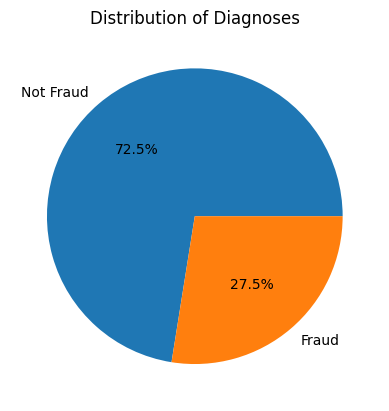

In [ ]:
count = df_train['Fraud'].value_counts()

plt.pie(count, labels=["Not Fraud", "Fraud"], autopct='%1.1f%%')
plt.title('Distribution of Diagnoses')
plt.show()

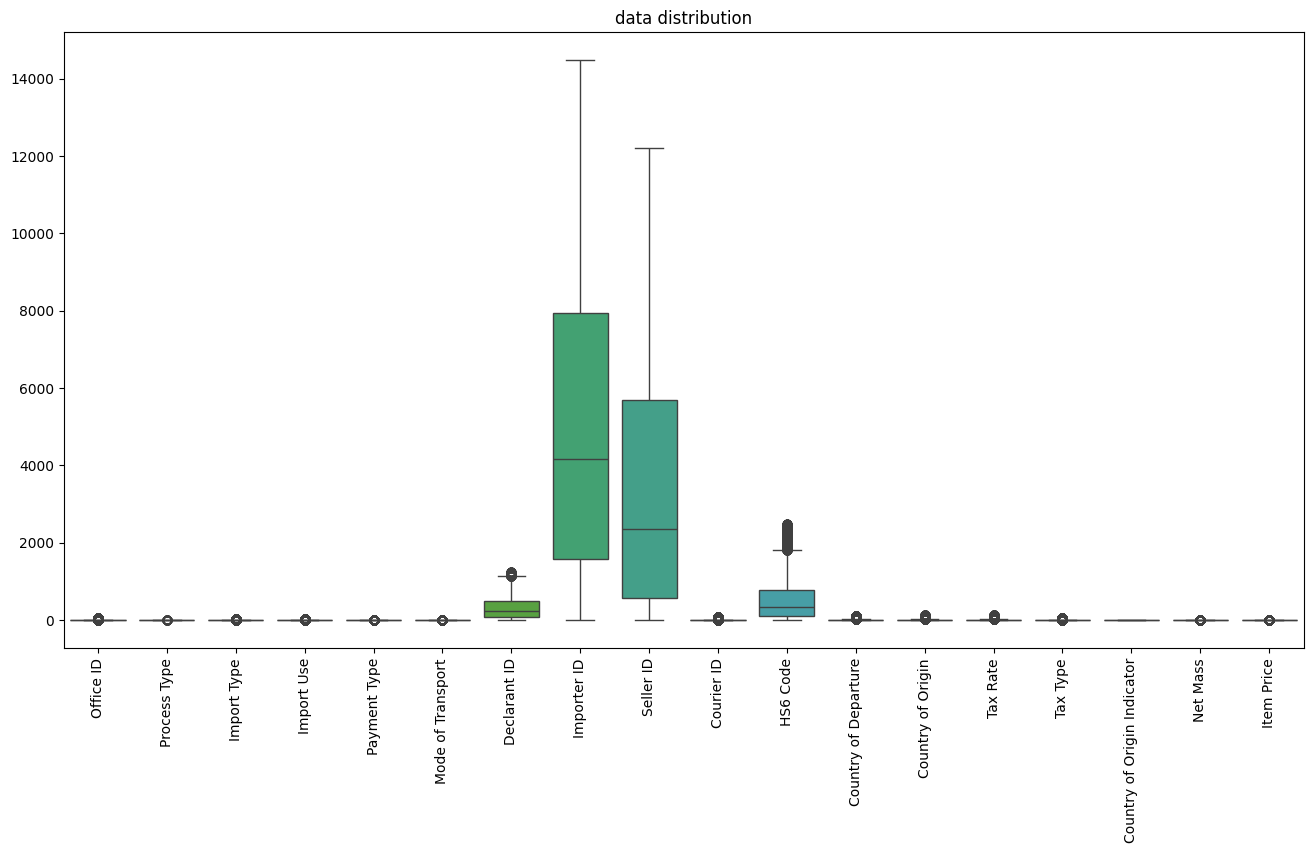

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(data=X_train)
plt.title("data distribution")
l=list(np.arange(18))
plt.xticks(l, list(X_train.columns),rotation=90)
plt.show()

In [ ]:
#data= pd.concat([X_train, y_train], axis=1)
#p=scatter_matrix(data,figsize=(25, 25))

<Axes: >

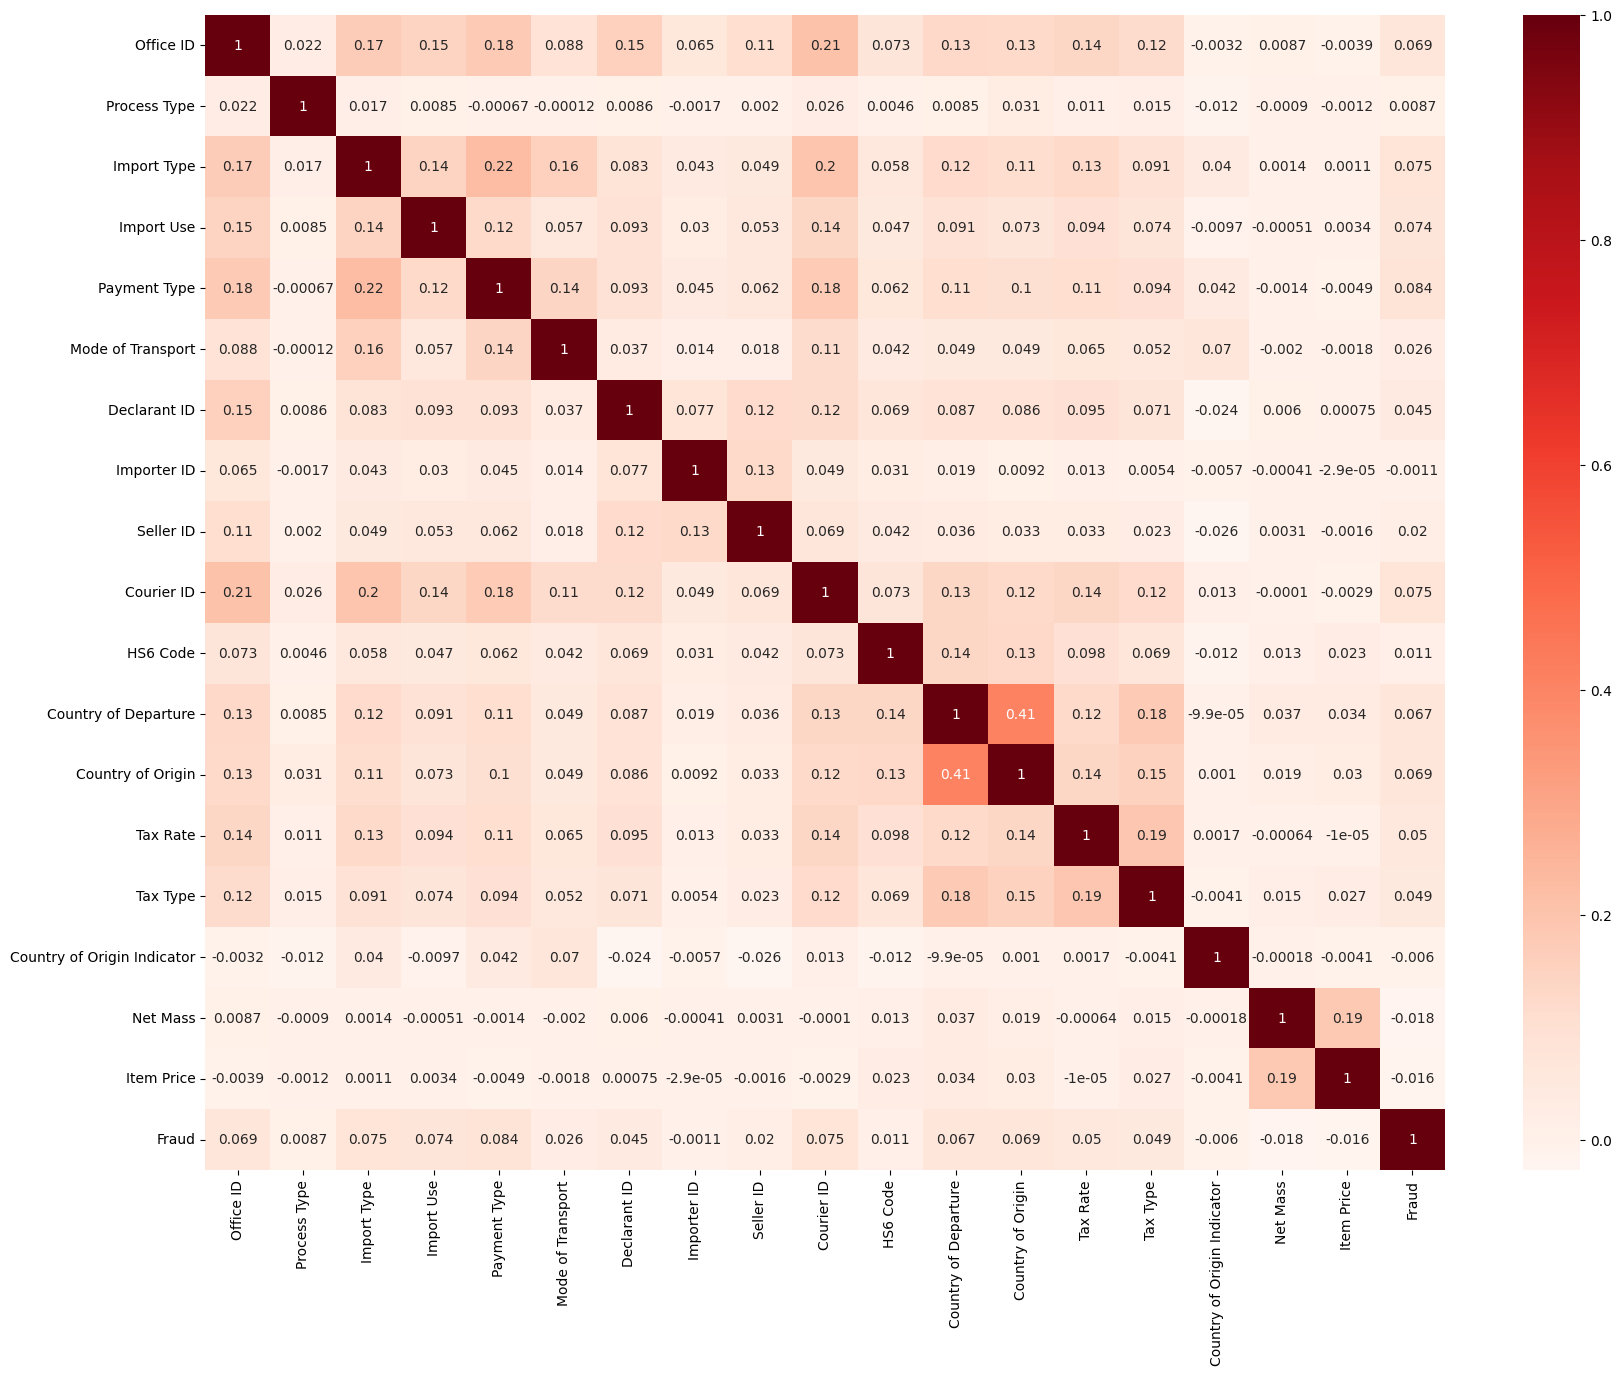

In [ ]:
# data= pd.concat([X_train, y_train], axis=1)
data = pd.concat([X_train_over, y_train_over], axis=1)
df_heatmap = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(df_heatmap,annot=True,cmap='Reds')

<Axes: >

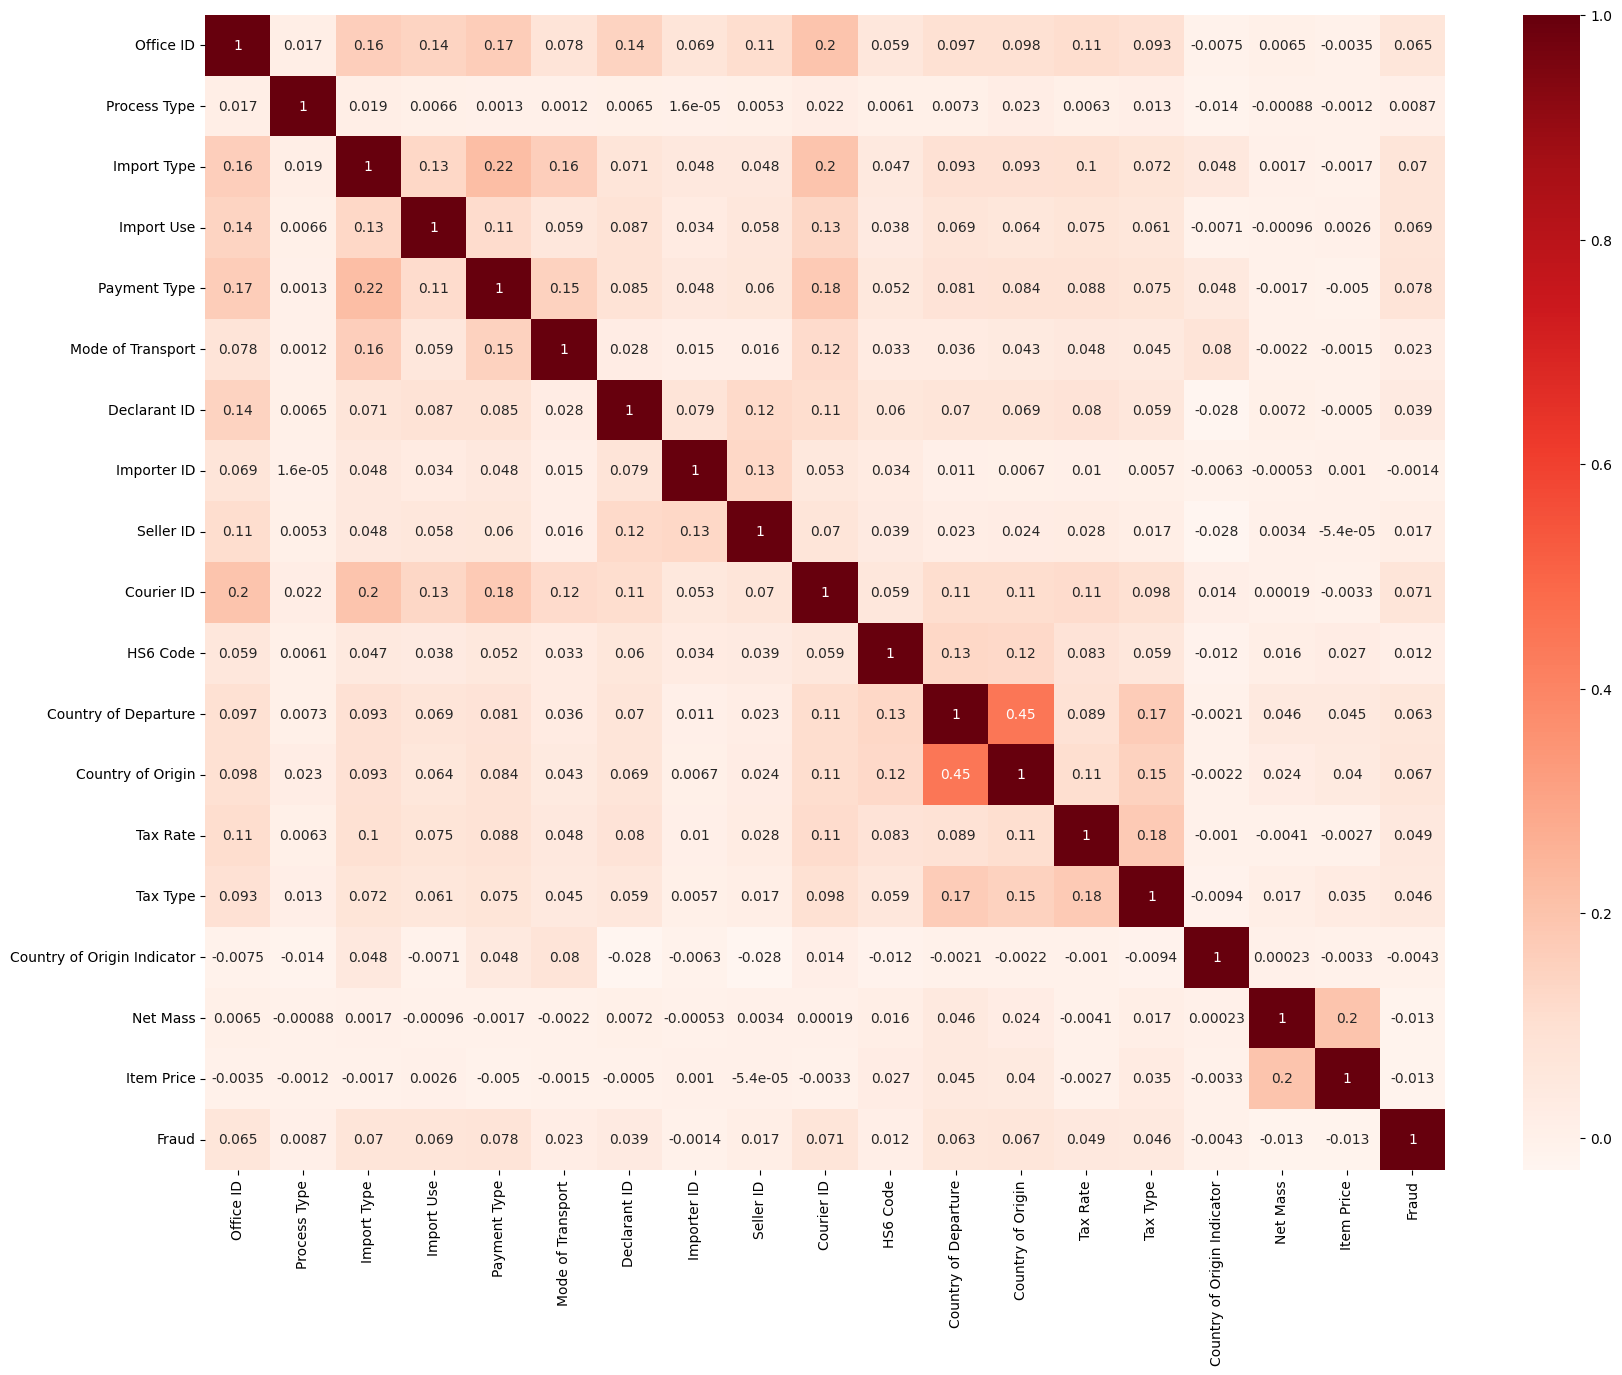

In [ ]:
data= pd.concat([X_train, y_train], axis=1)
df_heatmap = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(df_heatmap,annot=True,cmap='Reds')

# Training Models

In [ ]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


# evaluation
from sklearn.metrics import classification_report , confusion_matrix , ConfusionMatrixDisplay , accuracy_score
from lazypredict.Supervised import LazyClassifier
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_train_over = y_train_over.astype(int)
y_train_smote = y_train_smote.astype(int)

In [ ]:

def train(ml_model, X_train=X_train, y_train=y_train):


    # ✅
    param_grid = {}
    if ml_model == XGBClassifier:
        param_grid = {
            'learning_rate': [0.3, 0.6],
            'max_depth': [6, 8],
            'n_estimators': [1000, 2500],
            'subsample': [0.8, 1.0]
        }
    elif ml_model == LGBMClassifier:
        param_grid = {
            'learning_rate': [0.3, 0.6],
            'max_depth': [6, 8],
            'n_estimators': [1000, 2500],
            'num_leaves': [31, 64]
        }
    elif ml_model == AdaBoostClassifier:
        estimator = DecisionTreeClassifier()
        param_grid = {
            'n_estimators': [1000, 2500],
            'learning_rate': [0.5, 0.6],
            'estimator': [estimator]
        }
    elif ml_model == LogisticRegression:
        param_grid = {
            'C': [100.0, 500.0],
            'solver': ['liblinear'],
            'max_iter': [5000],
            'class_weight': ['balanced']
        }
    elif ml_model == DecisionTreeClassifier:
        param_grid = {
            'max_depth': [6, 8],
            'min_samples_split': [5, 10],
            'min_samples_leaf': [5]
        }
    elif ml_model == RandomForestClassifier:
        param_grid = {
            'n_estimators': [1000, 2500],
            'max_depth': [6, 8],
            'min_samples_split': [10],
            'min_samples_leaf': [5],
            'max_features': ['sqrt']
        }

    #
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid = GridSearchCV(ml_model(), param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=0)
    grid.fit(X_cv, y_cv)

    #
    model = grid.best_estimator_
    print(f"\n✅ Best Params for {ml_model.__name__}: {grid.best_params_}")

        # ✅ Cross-Validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision')
        print(f"\n📊 Cross-Validation Precision Scores for RandomForest: {scores}")
        print(f"✅ Average Precision: {scores.mean():.4f}")

    else:
        model = ml_model()

    # ✅ Cross-validation
    if ml_model != RandomForestClassifier:
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        metrics = ['accuracy', 'precision', 'recall', 'f1']

        for metric in metrics:
            scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=metric)
            print(f"\n📊 Cross-Validation {metric.capitalize()} Scores for {ml_model.__name__}: {scores}")
            print(f"✅ Average {metric.capitalize()}: {scores.mean():.4f}")

    #
    model.fit(X_train, y_train)
    return model

In [ ]:
feature_importance_models = (
    RandomForestClassifier,
    GradientBoostingClassifier,
    XGBClassifier,
    LGBMClassifier,
    DecisionTreeClassifier,
    AdaBoostClassifier,
)


def evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train, y_train=y_train):
    print(30*"-", model.__class__.__name__, 30*"-")

    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)

    Train_acc = accuracy_score(y_train, y_pred_train)
    Test_acc = accuracy_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(20*"-", "Accuracy", 20*"-")
    print("Train Accuracy:", Train_acc)
    print("Test Accuracy:", Test_acc)

    print(20*"-", "Confusion Matrix", 20*"-")
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_display.plot()
    plt.show()

    print("\nClassification Report:\n", report)

    if isinstance(model, feature_importance_models):
        try:
            importances = model.feature_importances_

            if hasattr(X_train, 'columns'):
                feature_names = X_train.columns
            else:
                feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

            indices = np.argsort(importances)[::-1]
            sorted_feature_names = np.array(feature_names)[indices]

            plt.figure(figsize=(12, 6))
            plt.title("Feature Importances")
            plt.bar(range(X_train.shape[1]), importances[indices], align="center")
            plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
            plt.xlabel("Feature")
            plt.ylabel("Importance")
            plt.tight_layout()
            plt.show()
        except AttributeError:
            print("This model does not contain feature_importances_ directly.")


In [ ]:
def precision_at_n(X_test, y_test, model, n_percent=0.10):

    if hasattr(model, "predict_proba"):
        scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X_test)
    else:
        raise ValueError("The model must support predict_proba or decision_function.")

    n_top = int(len(y_test) * n_percent)

    top_indices = np.argsort(scores)[-n_top:]

    true_positives = y_test[top_indices].sum()
    precision_at_n = true_positives / n_top

    return print(f"precision@{n_percent}: {(precision_at_n)*100}%")


In [ ]:
def recall_at_n(X_test, y_test, model, n_percent=0.10):

    if hasattr(model, "predict_proba"):
        scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X_test)
    else:
        raise ValueError("The model must support predict_proba or decision_function.")

    n_top = int(len(y_test) * n_percent)

    top_indices = np.argsort(scores)[-n_top:]

    true_positives = y_test[top_indices].sum()
    total_positives = y_test.sum()

    recall_at_n = true_positives / total_positives

    return print(f"recall@{n_percent}: {round(recall_at_n,2)*100}%")


In [ ]:
from sklearn.metrics import recall_score

def recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2]):
    if not hasattr(model, "predict_proba"):
        raise ValueError("This function requires a model with predict_proba method.")

    y_scores = model.predict_proba(X_test)[:, 1]

    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        recall = recall_score(y_test, y_pred)
        print(f"Threshold = {threshold:.2f} → Recall = {recall*100:.2f}%")


In [ ]:
from sklearn.metrics import precision_score

def precision_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2]):
    if not hasattr(model, "predict_proba"):
        raise ValueError("This function requires a model with predict_proba method.")

    y_scores = model.predict_proba(X_test)[:, 1]

    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        precision = precision_score(y_test, y_pred, zero_division=0)
        print(f"Threshold = {threshold:.2f} → Precision = {precision * 100:.2f}%")


In [ ]:
from sklearn.metrics import precision_score, recall_score

def precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2]):
    if not hasattr(model, "predict_proba"):
        raise ValueError("This function requires a model with predict_proba method.")

    y_scores = model.predict_proba(X_test)[:, 1]

    print(f"{'Threshold':<10}{'Precision':<15}{'Recall'}")
    print("-" * 35)
    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred)
        print(f"{threshold:<10.2f}{precision * 100:<15.2f}{recall * 100:.2f}")


 ## Training with SMOTE


#### 1- Logistic Regression


📊 Cross-Validation Accuracy Scores for LogisticRegression: [0.57840555 0.57782414 0.57898697 0.57895277 0.57763869]
✅ Average Accuracy: 0.5784

📊 Cross-Validation Precision Scores for LogisticRegression: [0.5781719  0.57660449 0.57878581 0.57817049 0.57622565]
✅ Average Precision: 0.5776

📊 Cross-Validation Recall Scores for LogisticRegression: [0.57979342 0.58567617 0.58036936 0.58406293 0.58690745]
✅ Average Recall: 0.5834

📊 Cross-Validation F1 Scores for LogisticRegression: [0.57898152 0.58110493 0.5795765  0.58110177 0.5815175 ]
✅ Average F1: 0.5805
------------------------------ LogisticRegression ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.5788951666963077
Test Accuracy: 0.5587516825365173
-------------------- Confusion Matrix --------------------


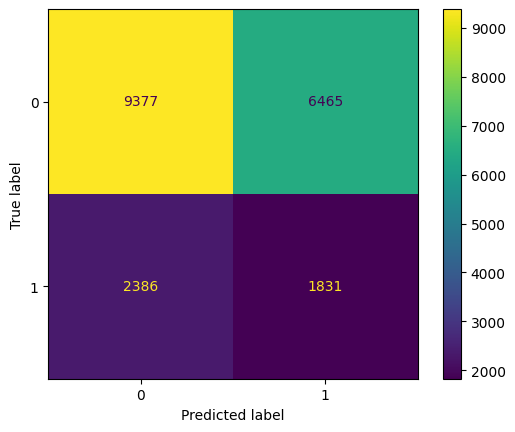


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.59      0.68     15842
           1       0.22      0.43      0.29      4217

    accuracy                           0.56     20059
   macro avg       0.51      0.51      0.49     20059
weighted avg       0.68      0.56      0.60     20059



In [ ]:
# training with SMOTE
model = train(LogisticRegression, X_train=X_train_smote, y_train=y_train_smote)
evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_smote, y_train=y_train_smote)

In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 22.394014962593516%
None
recall@0.1: 11.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      22.07          43.42
0.40      21.18          83.31
0.30      21.02          99.24
0.20      21.04          99.95


#### 2- DecisionTreeClassifier


📊 Cross-Validation Accuracy Scores for DecisionTreeClassifier: [0.66688327 0.67536509 0.66336058 0.66862752 0.66635885]
✅ Average Accuracy: 0.6681

📊 Cross-Validation Precision Scores for DecisionTreeClassifier: [0.68938747 0.71048526 0.69134022 0.69862241 0.69152622]
✅ Average Precision: 0.6963

📊 Cross-Validation Recall Scores for DecisionTreeClassifier: [0.60742869 0.59190095 0.59028728 0.59316005 0.60065668]
✅ Average Recall: 0.5967

📊 Cross-Validation F1 Scores for DecisionTreeClassifier: [0.64581818 0.64579446 0.63682987 0.64158621 0.64289636]
✅ Average F1: 0.6426
------------------------------ DecisionTreeClassifier ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.6720590448308412
Test Accuracy: 0.6657360785682237
-------------------- Confusion Matrix --------------------


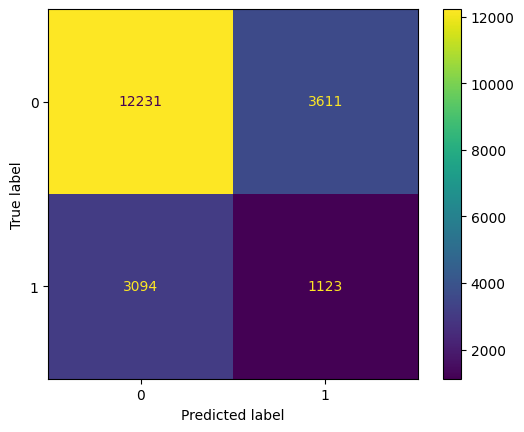


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78     15842
           1       0.24      0.27      0.25      4217

    accuracy                           0.67     20059
   macro avg       0.52      0.52      0.52     20059
weighted avg       0.68      0.67      0.67     20059



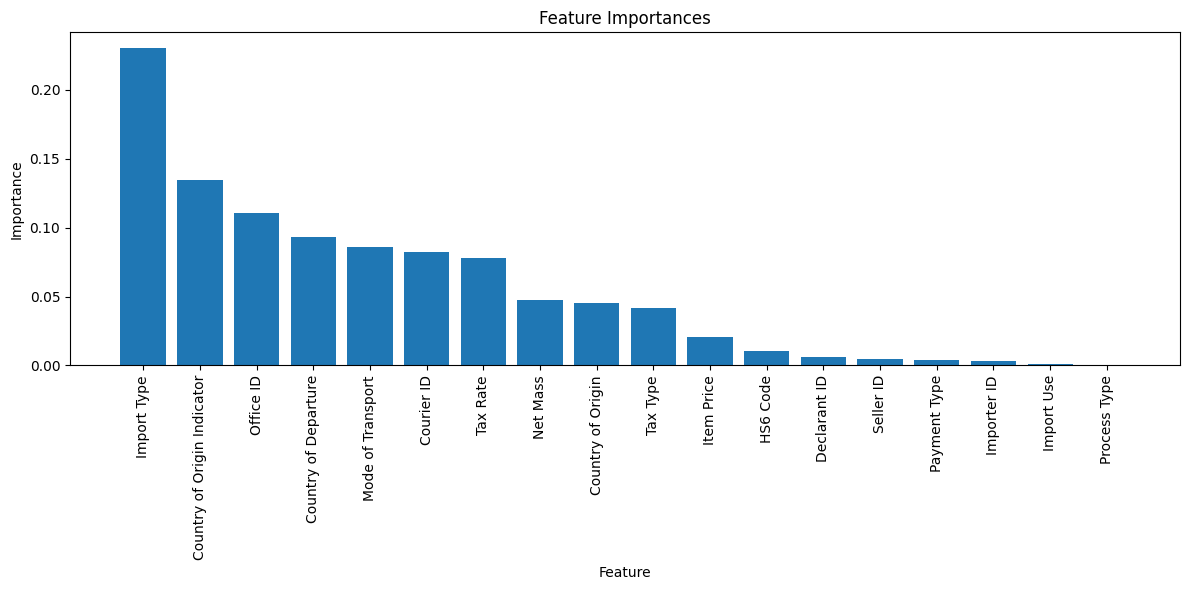

In [ ]:
model = train(DecisionTreeClassifier, X_train=X_train_smote, y_train=y_train_smote)
evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_smote, y_train=y_train_smote)

In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 24.48877805486284%
None
recall@0.1: 12.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      23.73          26.65
0.40      23.72          52.41
0.30      22.91          77.76
0.20      21.72          98.06


#### 3- RandomForestClassifier


📊 Cross-Validation Precision Scores for RandomForest: [0.7389932  0.74195629 0.74543081 0.74043958 0.73918595]
✅ Average Precision: 0.7412
------------------------------ RandomForestClassifier ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.710083861170773
Test Accuracy: 0.6980906326337305
-------------------- Confusion Matrix --------------------


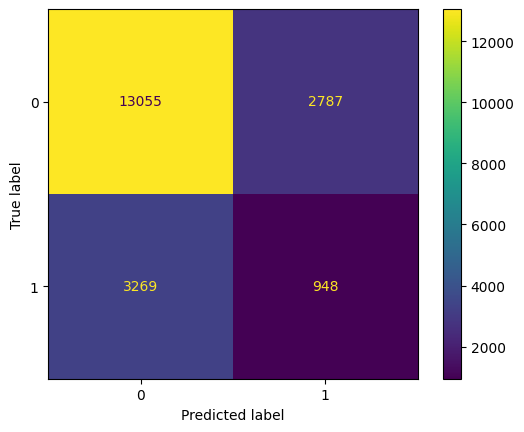


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81     15842
           1       0.25      0.22      0.24      4217

    accuracy                           0.70     20059
   macro avg       0.53      0.52      0.53     20059
weighted avg       0.68      0.70      0.69     20059



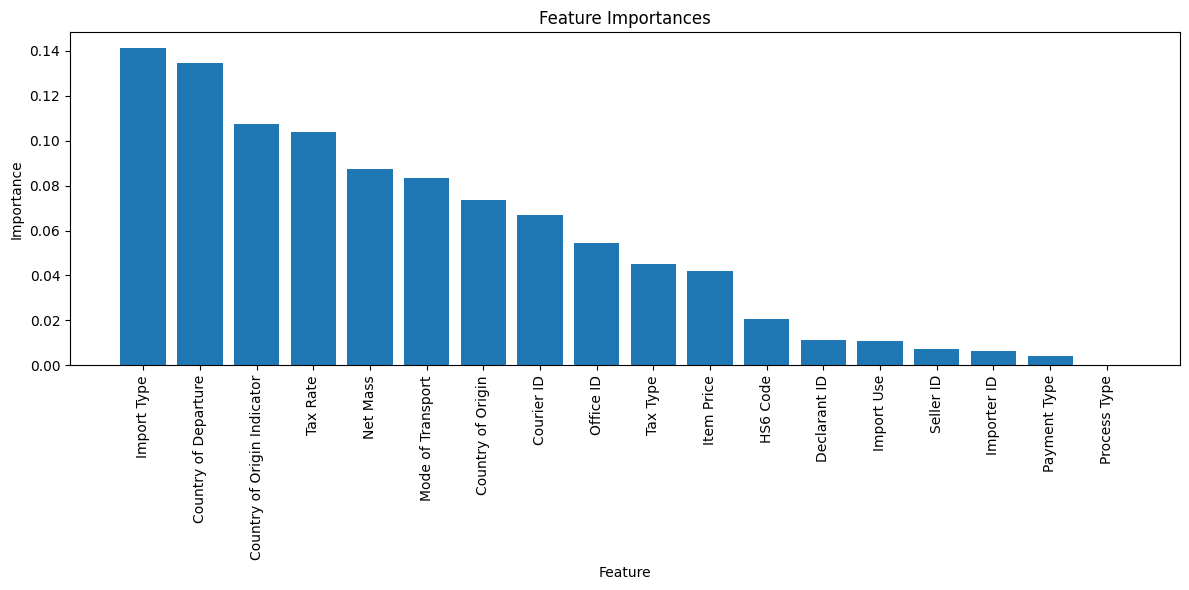

In [ ]:
model = train(RandomForestClassifier, X_train=X_train_smote, y_train=y_train_smote)
evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_smote, y_train=y_train_smote)

In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 26.583541147132166%
None
recall@0.1: 13.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      25.38          22.48
0.40      24.07          59.69
0.30      22.26          95.00
0.20      21.09          99.98


#### 4- GradientBoostingClassifier


📊 Cross-Validation Accuracy Scores for GradientBoostingClassifier: [0.71558535 0.71719279 0.72020247 0.71709019 0.71773035]
✅ Average Accuracy: 0.7176

📊 Cross-Validation Precision Scores for GradientBoostingClassifier: [0.74088512 0.74359368 0.74882139 0.74318112 0.74172236]
✅ Average Precision: 0.7436

📊 Cross-Validation Recall Scores for GradientBoostingClassifier: [0.66304125 0.66297284 0.6627223  0.66347469 0.66810315]
✅ Average Recall: 0.6641

📊 Cross-Validation F1 Scores for GradientBoostingClassifier: [0.69980507 0.70097277 0.70314598 0.70106967 0.70299061]
✅ Average F1: 0.7016
------------------------------ GradientBoostingClassifier ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.7183605346320643
Test Accuracy: 0.6884690164016153
-------------------- Confusion Matrix --------------------


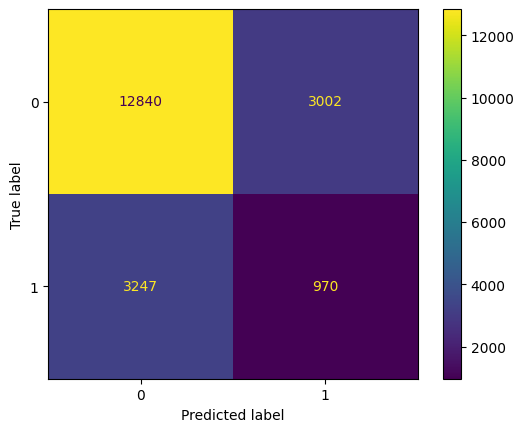


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80     15842
           1       0.24      0.23      0.24      4217

    accuracy                           0.69     20059
   macro avg       0.52      0.52      0.52     20059
weighted avg       0.68      0.69      0.69     20059



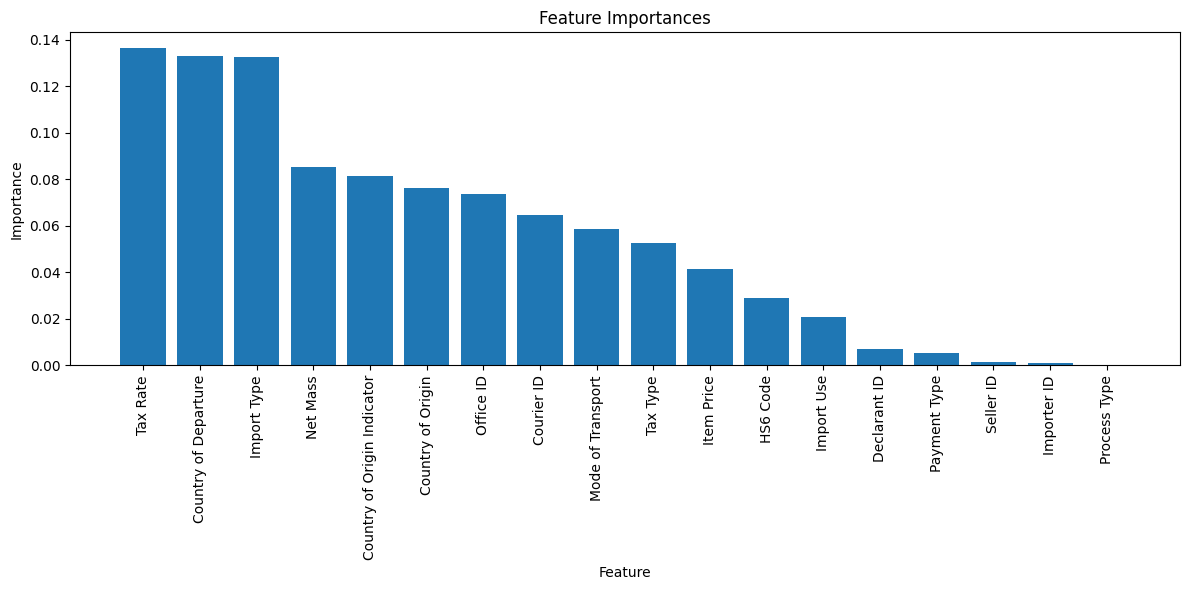

In [ ]:
model = train(GradientBoostingClassifier, X_train=X_train_smote, y_train=y_train_smote)
evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_smote, y_train=y_train_smote)

In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 25.33665835411471%
None
recall@0.1: 12.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      24.42          23.00
0.40      24.10          50.44
0.30      22.78          79.91
0.20      21.68          97.46


#### 5- XGBClassifier


📊 Cross-Validation Accuracy Scores for XGBClassifier: [0.87000239 0.87304627 0.8701734  0.86774513 0.8724605 ]
✅ Average Accuracy: 0.8707

📊 Cross-Validation Precision Scores for XGBClassifier: [0.87651399 0.88069808 0.87883242 0.87716591 0.88114238]
✅ Average Precision: 0.8789

📊 Cross-Validation Recall Scores for XGBClassifier: [0.86134483 0.86298652 0.85875513 0.85526676 0.86107121]
✅ Average Recall: 0.8599

📊 Cross-Validation F1 Scores for XGBClassifier: [0.86886321 0.87175235 0.86867778 0.86607792 0.87099118]
✅ Average F1: 0.8693
------------------------------ XGBClassifier ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.9979205712956756
Test Accuracy: 0.9686923575452415
-------------------- Confusion Matrix --------------------


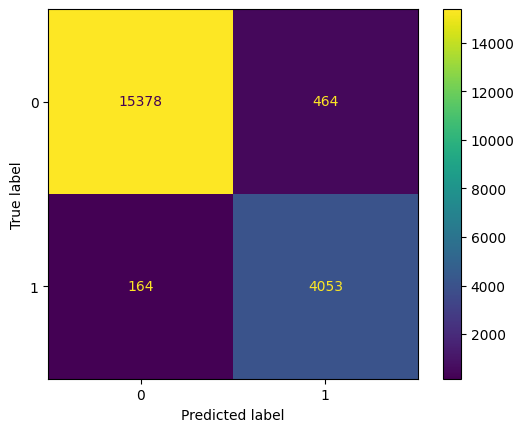


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     15842
           1       0.90      0.96      0.93      4217

    accuracy                           0.97     20059
   macro avg       0.94      0.97      0.95     20059
weighted avg       0.97      0.97      0.97     20059



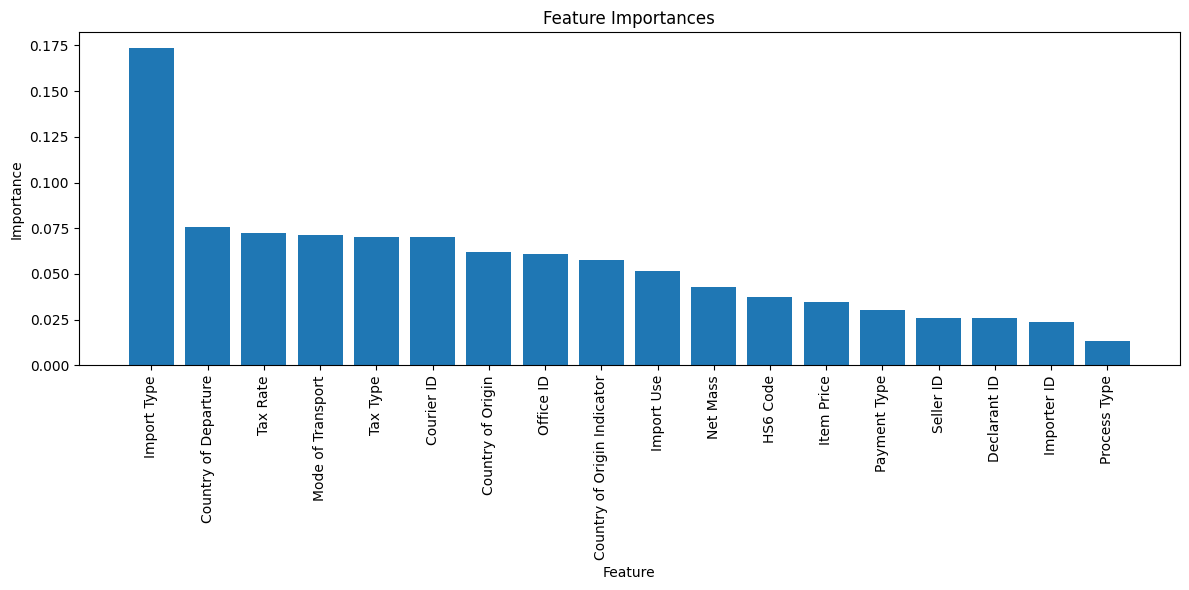

In [ ]:
model = train(XGBClassifier, X_train=X_train_smote, y_train=y_train_smote)
evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_smote, y_train=y_train_smote)

In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 94.1147132169576%
None
recall@0.1: 45.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      89.73          96.11
0.40      87.45          97.13
0.30      83.96          97.70
0.20      76.65          98.22


#### 6- SVM

In [ ]:
#model = train(SVC, X_train=X_train_smote, y_train=y_train_smote)
#evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_smote, y_train=y_train_smote)

In [ ]:
#print(precision_at_n(X_test, y_test, model, n_percent=0.10))
#print(recall_at_n(X_test, y_test, model, n_percent=0.10))

In [ ]:
#precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

#### 7- GaussianNB


📊 Cross-Validation Accuracy Scores for GaussianNB: [0.534218   0.541879   0.5380485  0.53695407 0.53793009]
✅ Average Accuracy: 0.5378

📊 Cross-Validation Precision Scores for GaussianNB: [0.56565126 0.58065366 0.57311786 0.57144746 0.57302779]
✅ Average Precision: 0.5728

📊 Cross-Validation Recall Scores for GaussianNB: [0.294685   0.3013886  0.29835841 0.29569083 0.29762638]
✅ Average Recall: 0.2975

📊 Cross-Validation F1 Scores for GaussianNB: [0.38749719 0.39681182 0.39242499 0.38972279 0.39177021]
✅ Average F1: 0.3916
------------------------------ GaussianNB ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.5377238463958849
Test Accuracy: 0.6722169599680942
-------------------- Confusion Matrix --------------------


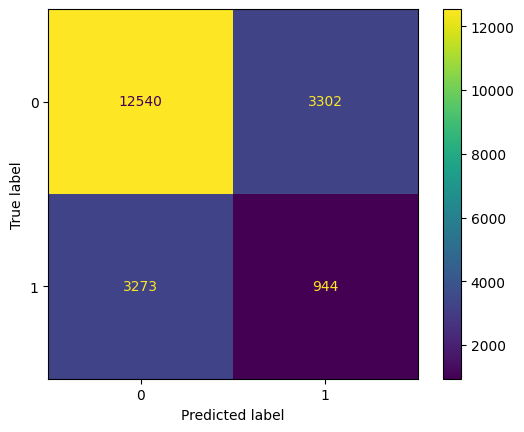


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79     15842
           1       0.22      0.22      0.22      4217

    accuracy                           0.67     20059
   macro avg       0.51      0.51      0.51     20059
weighted avg       0.67      0.67      0.67     20059



In [ ]:
model = train(GaussianNB, X_train=X_train_smote, y_train=y_train_smote)
evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_smote, y_train=y_train_smote)

In [ ]:


print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 22.24438902743142%
None
recall@0.1: 11.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      22.23          22.39
0.40      21.68          29.45
0.30      21.59          59.28
0.20      21.27          92.58


#### 8- AdaBoostClassifier


📊 Cross-Validation Accuracy Scores for AdaBoostClassifier: [0.80207941 0.80950101 0.79192175 0.79428161 0.79406936]
✅ Average Accuracy: 0.7984

📊 Cross-Validation Precision Scores for AdaBoostClassifier: [0.82628935 0.83482572 0.81931767 0.82019796 0.81764445]
✅ Average Precision: 0.8237

📊 Cross-Validation Recall Scores for AdaBoostClassifier: [0.7649634  0.77166701 0.74904241 0.75383037 0.75696012]
✅ Average Recall: 0.7593

📊 Cross-Validation F1 Scores for AdaBoostClassifier: [0.79444464 0.80200483 0.78260559 0.785615   0.78613292]
✅ Average F1: 0.7902
------------------------------ AdaBoostClassifier ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.8386048675048223
Test Accuracy: 0.8033800289147016
-------------------- Confusion Matrix --------------------


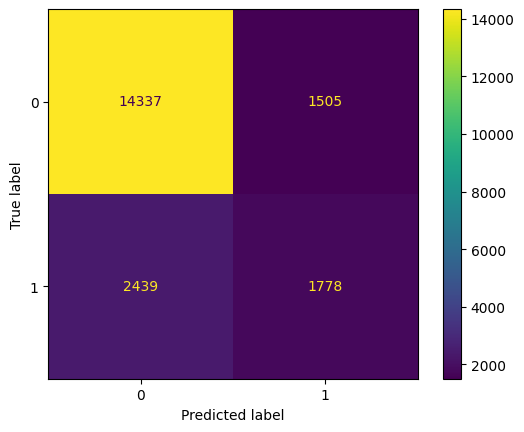


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88     15842
           1       0.54      0.42      0.47      4217

    accuracy                           0.80     20059
   macro avg       0.70      0.66      0.68     20059
weighted avg       0.79      0.80      0.79     20059



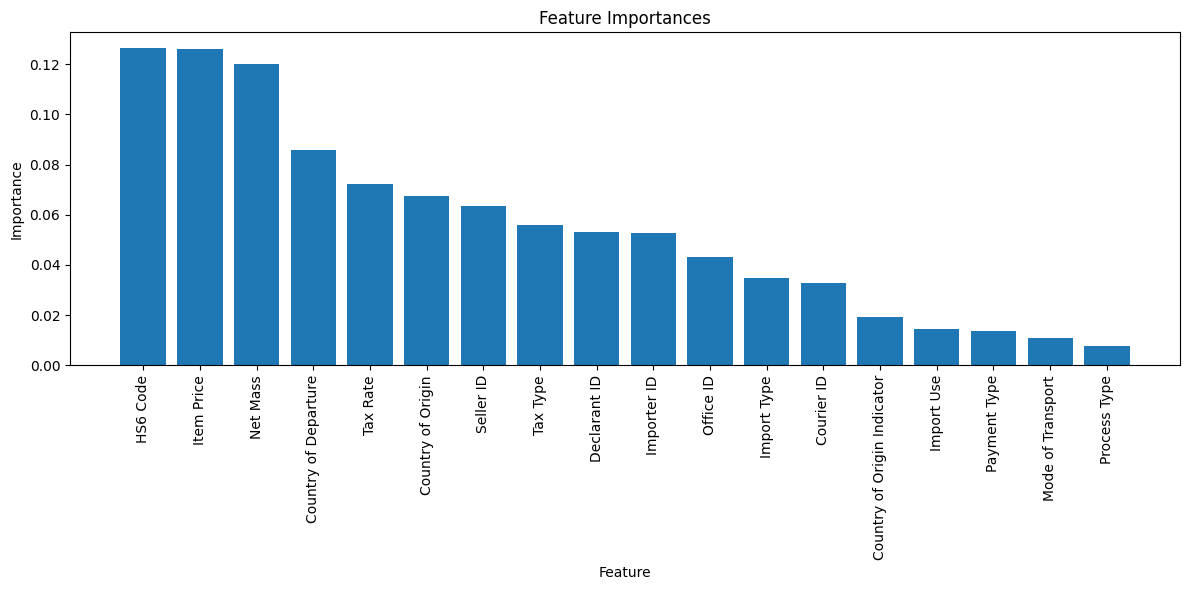

In [ ]:
model = train(AdaBoostClassifier, X_train=X_train_smote, y_train=y_train_smote)
evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_smote, y_train=y_train_smote)

In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 58.55361596009975%
None
recall@0.1: 28.000000000000004%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      54.16          42.16
0.40      21.60          100.00
0.30      21.02          100.00
0.20      21.02          100.00


#### 9- LGBMClassifier

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 58478, number of negative: 58477
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2117
[LightGBM] [Info] Number of data points in the train set: 116955, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500004 -> initscore=0.000017
[LightGBM] [Info] Start training from score 0.000017
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

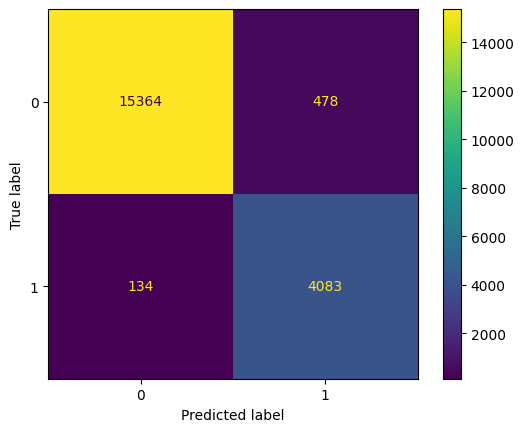


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     15842
           1       0.90      0.97      0.93      4217

    accuracy                           0.97     20059
   macro avg       0.94      0.97      0.96     20059
weighted avg       0.97      0.97      0.97     20059



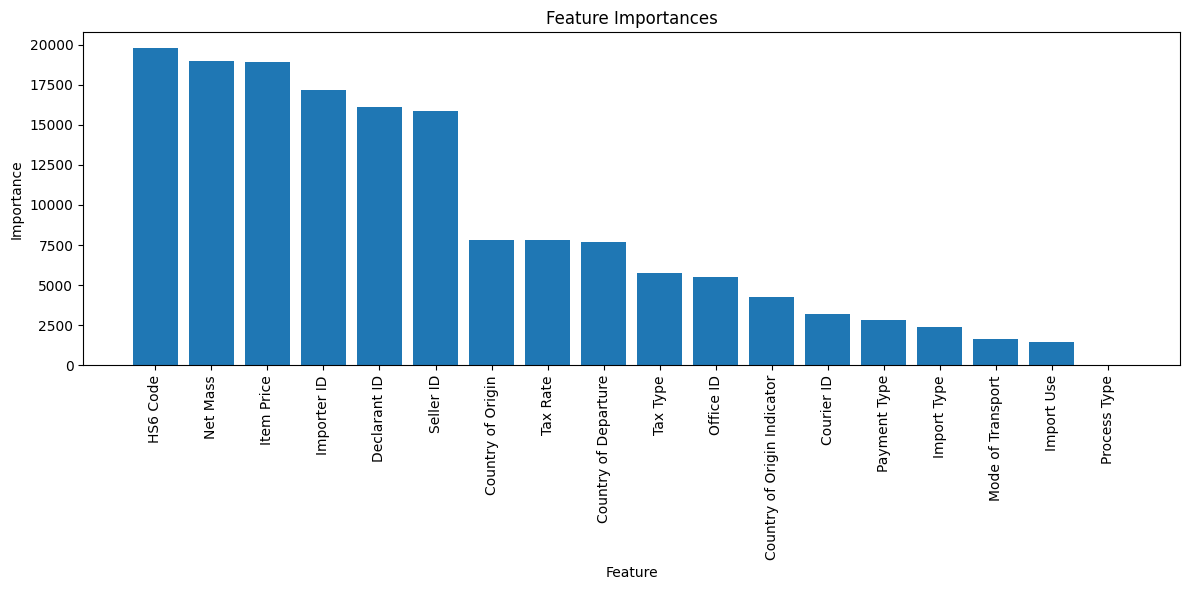

In [ ]:
model = train(LGBMClassifier, X_train=X_train_smote, y_train=y_train_smote)
evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_smote, y_train=y_train_smote)

In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 95.86034912718205%
None
recall@0.1: 46.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      89.52          96.82
0.40      88.48          97.06
0.30      87.37          97.27
0.20      86.18          97.49


#### 10- KNeighborsClassifier


📊 Cross-Validation Accuracy Scores for KNeighborsClassifier: [0.71965525 0.71873183 0.72016827 0.71989466 0.71803817]
✅ Average Accuracy: 0.7193

📊 Cross-Validation Precision Scores for KNeighborsClassifier: [0.67890573 0.67932253 0.68118879 0.67999104 0.67936526]
✅ Average Precision: 0.6798

📊 Cross-Validation Recall Scores for KNeighborsClassifier: [0.83350434 0.82857925 0.82777018 0.83077975 0.82584308]
✅ Average Recall: 0.8293

📊 Cross-Validation F1 Scores for KNeighborsClassifier: [0.7483035  0.74656394 0.74735997 0.74786035 0.745477  ]
✅ Average F1: 0.7471
------------------------------ KNeighborsClassifier ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.8363681136024734
Test Accuracy: 0.7160875417518321
-------------------- Confusion Matrix --------------------


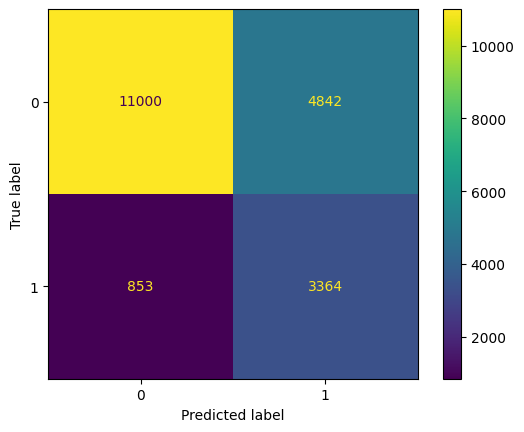


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.69      0.79     15842
           1       0.41      0.80      0.54      4217

    accuracy                           0.72     20059
   macro avg       0.67      0.75      0.67     20059
weighted avg       0.82      0.72      0.74     20059



In [ ]:
model = train(KNeighborsClassifier, X_train=X_train_smote, y_train=y_train_smote)
evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_smote, y_train=y_train_smote)

In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 72.41895261845387%
None
recall@0.1: 34.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      40.99          79.77
0.40      32.40          92.93
0.30      32.40          92.93
0.20      26.85          98.58


 ## Training with Over Sampler


#### 1- Logistic Regression

In [ ]:
exit()  # traing with Over Sampler
#model = train(LogisticRegression, X_train=X_train_over, y_train=y_train_over)
#evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_over, y_train=y_train_over)

In [ ]:
#print(precision_at_n(X_test, y_test, model, n_percent=0.10))
#print(recall_at_n(X_test, y_test, model, n_percent=0.10))

In [ ]:
#precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

#### 2- DecisionTreeClassifier

In [ ]:
#model = train(DecisionTreeClassifier, X_train=X_train_over, y_train=y_train_over)
#evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_over, y_train=y_train_over)

In [ ]:
#print(precision_at_n(X_test, y_test, model, n_percent=0.10))
#print(recall_at_n(X_test, y_test, model, n_percent=0.10))

In [ ]:
#precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

: 

#### 3- RandomForestClassifier

------------------------------ RandomForestClassifier ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 1.0
Test Accuracy: 0.9810558851388405
-------------------- Confusion Matrix --------------------


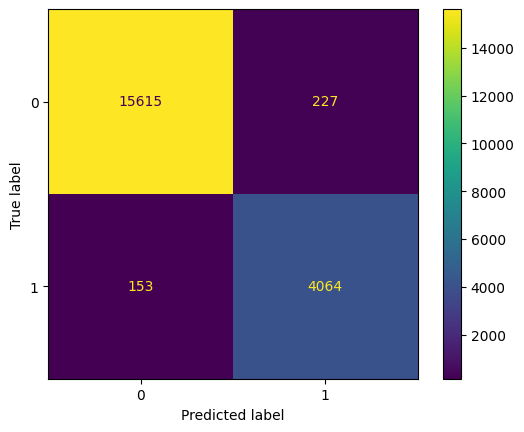


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     15842
           1       0.95      0.96      0.96      4217

    accuracy                           0.98     20059
   macro avg       0.97      0.97      0.97     20059
weighted avg       0.98      0.98      0.98     20059



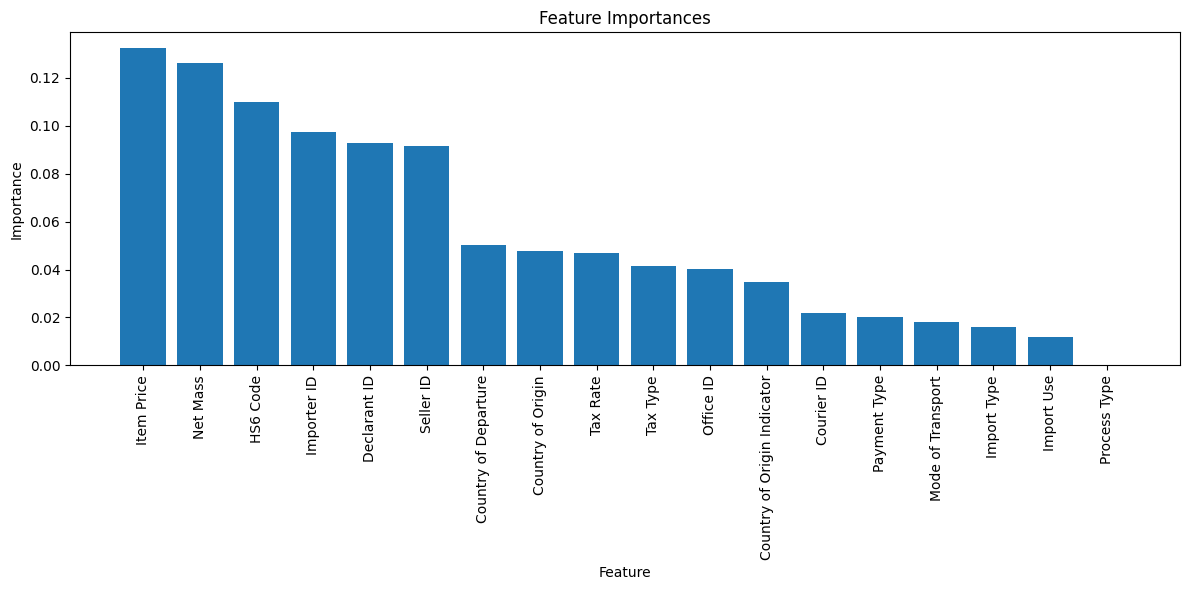

In [ ]:
#model = train(RandomForestClassifier, X_train=X_train_over, y_train=y_train_over)
#evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_over, y_train=y_train_over)

In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 100.0%
None
recall@0.1: 48.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      94.20          96.61
0.40      87.34          97.65
0.30      80.14          99.22
0.20      73.26          99.91


#### 4- GradientBoostingClassifier

------------------------------ GradientBoostingClassifier ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.6147516313939012
Test Accuracy: 0.6501321102746896
-------------------- Confusion Matrix --------------------


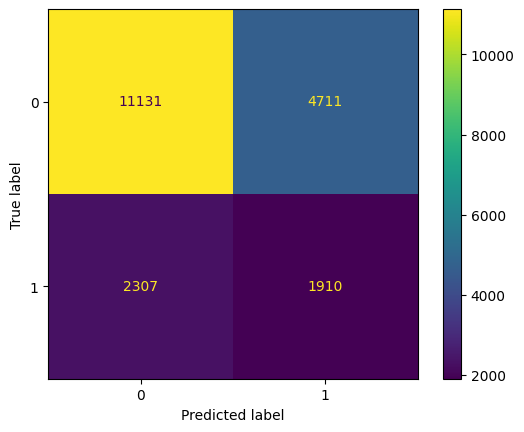


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.70      0.76     15842
           1       0.29      0.45      0.35      4217

    accuracy                           0.65     20059
   macro avg       0.56      0.58      0.56     20059
weighted avg       0.71      0.65      0.67     20059



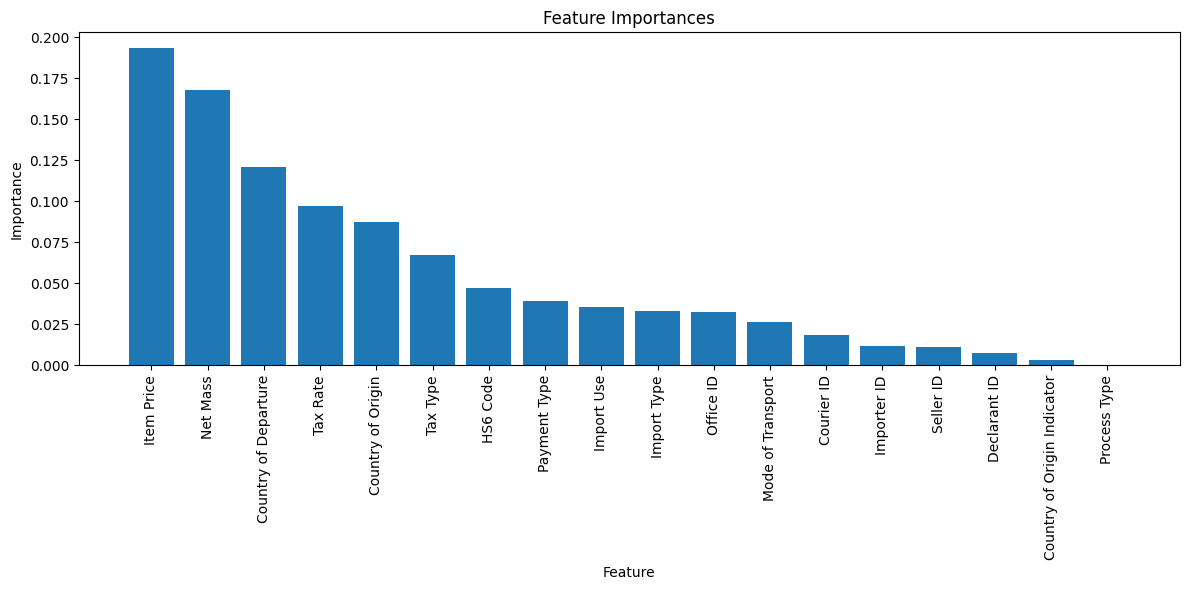

In [ ]:
model = train(GradientBoostingClassifier, X_train=X_train_over, y_train=y_train_over)
evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_over, y_train=y_train_over)

In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 32.01995012468828%
None
recall@0.1: 15.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      28.85          45.29
0.40      23.93          90.02
0.30      22.31          98.17
0.20      21.21          99.91


#### 5- XGBClassifier

------------------------------ XGBClassifier ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.7841019467283199
Test Accuracy: 0.7848845904581485
-------------------- Confusion Matrix --------------------


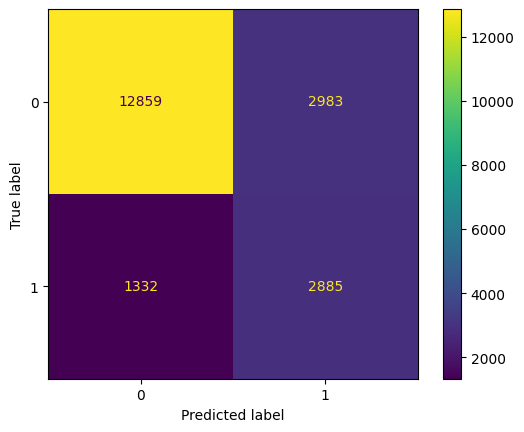


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86     15842
           1       0.49      0.68      0.57      4217

    accuracy                           0.78     20059
   macro avg       0.70      0.75      0.71     20059
weighted avg       0.82      0.78      0.80     20059



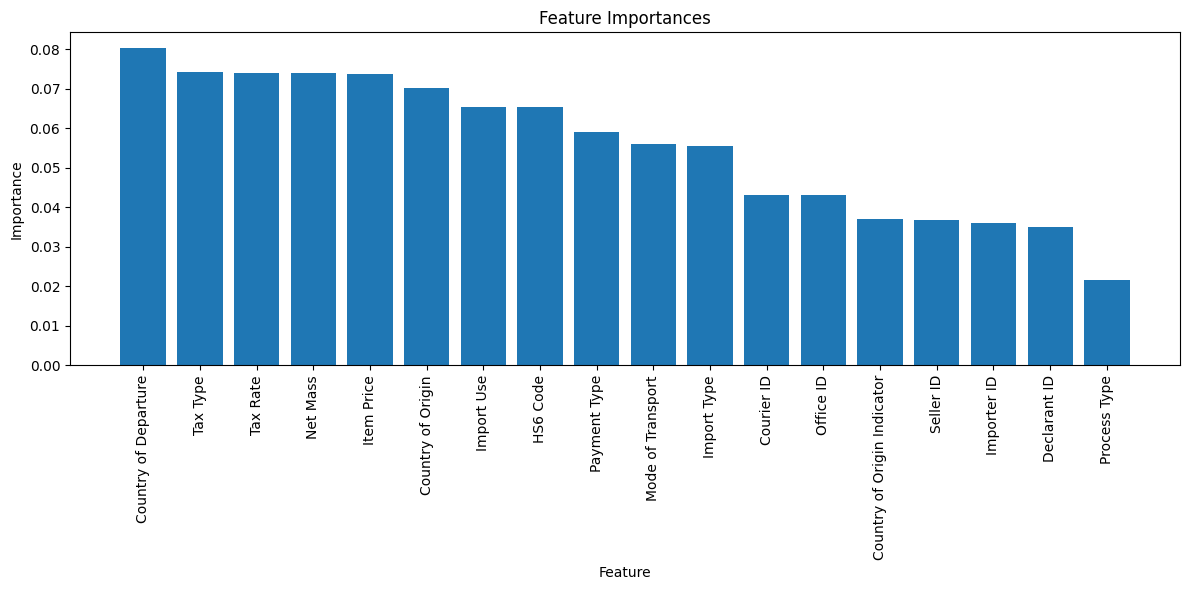

In [ ]:
model = train(XGBClassifier, X_train=X_train_over, y_train=y_train_over)
evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_over, y_train=y_train_over)

In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 66.73316708229426%
None
recall@0.1: 32.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      49.16          68.41
0.40      36.79          88.64
0.30      28.92          96.99
0.20      24.59          99.45


#### 6- SVM

In [ ]:
#model = train(SVC, X_train=X_train_over, y_train=y_train_over)
#evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_over, y_train=y_train_over)

In [ ]:
#print(precision_at_n(X_test, y_test, model, n_percent=0.10))
#print(recall_at_n(X_test, y_test, model, n_percent=0.10))

In [ ]:
# precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

#### 7- GaussianNB

------------------------------ GaussianNB ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.5493385501456968
Test Accuracy: 0.6771524004187647
-------------------- Confusion Matrix --------------------


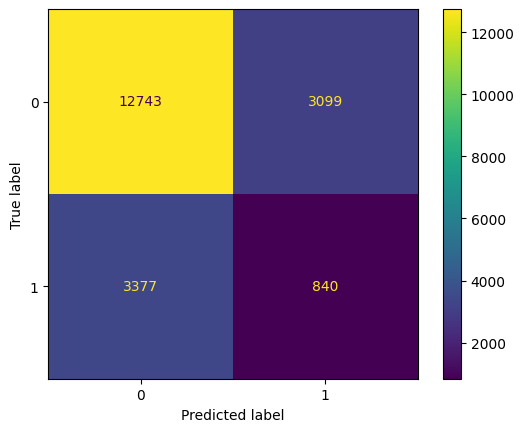


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80     15842
           1       0.21      0.20      0.21      4217

    accuracy                           0.68     20059
   macro avg       0.50      0.50      0.50     20059
weighted avg       0.67      0.68      0.67     20059



In [ ]:
model = train(GaussianNB, X_train=X_train_over, y_train=y_train_over)
evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_over, y_train=y_train_over)

In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 21.39650872817955%
None
recall@0.1: 10.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      21.33          19.92
0.40      21.50          24.59
0.30      22.19          29.93
0.20      21.98          37.51


#### 8- AdaBoostClassifier

------------------------------ AdaBoostClassifier ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.6072615839227328
Test Accuracy: 0.6316865247519816
-------------------- Confusion Matrix --------------------


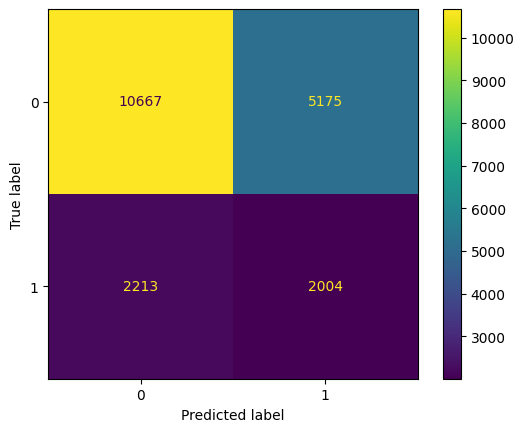


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.67      0.74     15842
           1       0.28      0.48      0.35      4217

    accuracy                           0.63     20059
   macro avg       0.55      0.57      0.55     20059
weighted avg       0.71      0.63      0.66     20059



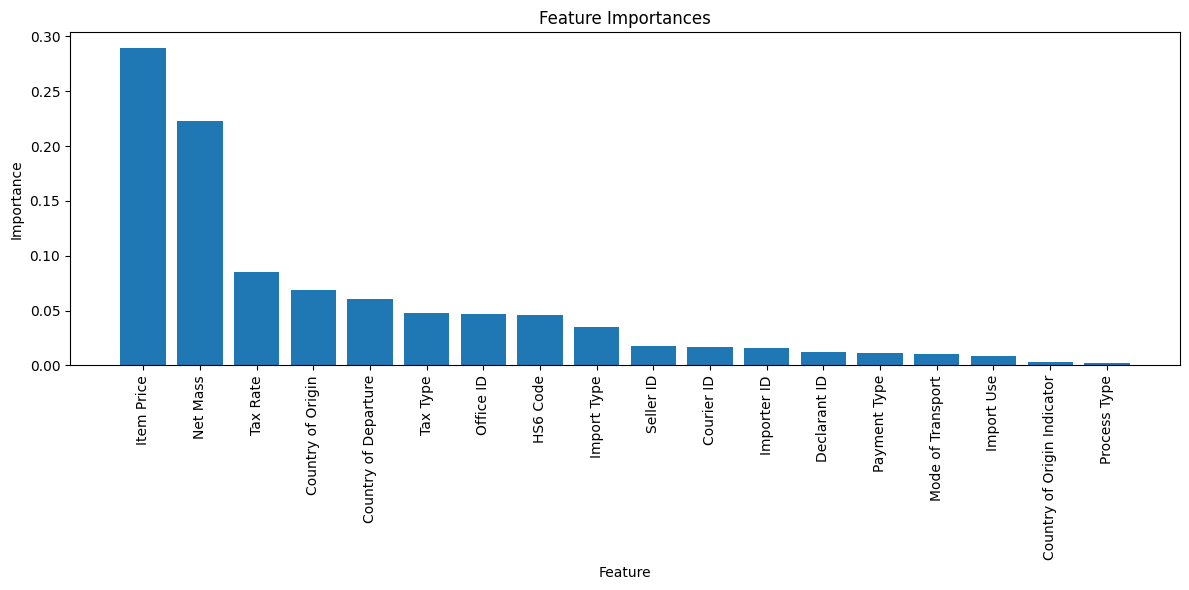

In [ ]:
model = train(AdaBoostClassifier, X_train=X_train_over, y_train=y_train_over)
evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_over, y_train=y_train_over)

In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 31.97007481296758%
None
recall@0.1: 15.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      27.91          47.52
0.40      21.34          99.81
0.30      21.15          100.00
0.20      21.06          100.00


#### 9- LGBMClassifier

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 73097, number of negative: 73097
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2108
[LightGBM] [Info] Number of data points in the train set: 146194, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
------------------------------ LGBMClassifier ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.9574401138213606
Test Accuracy: 0.9333466274490254
-------------------- Confusion Matrix --------------------

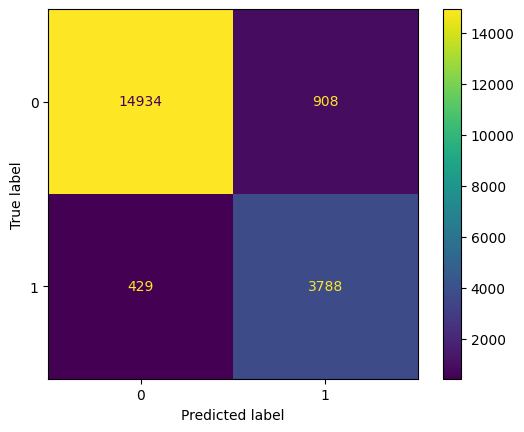


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96     15842
           1       0.81      0.90      0.85      4217

    accuracy                           0.93     20059
   macro avg       0.89      0.92      0.90     20059
weighted avg       0.94      0.93      0.93     20059



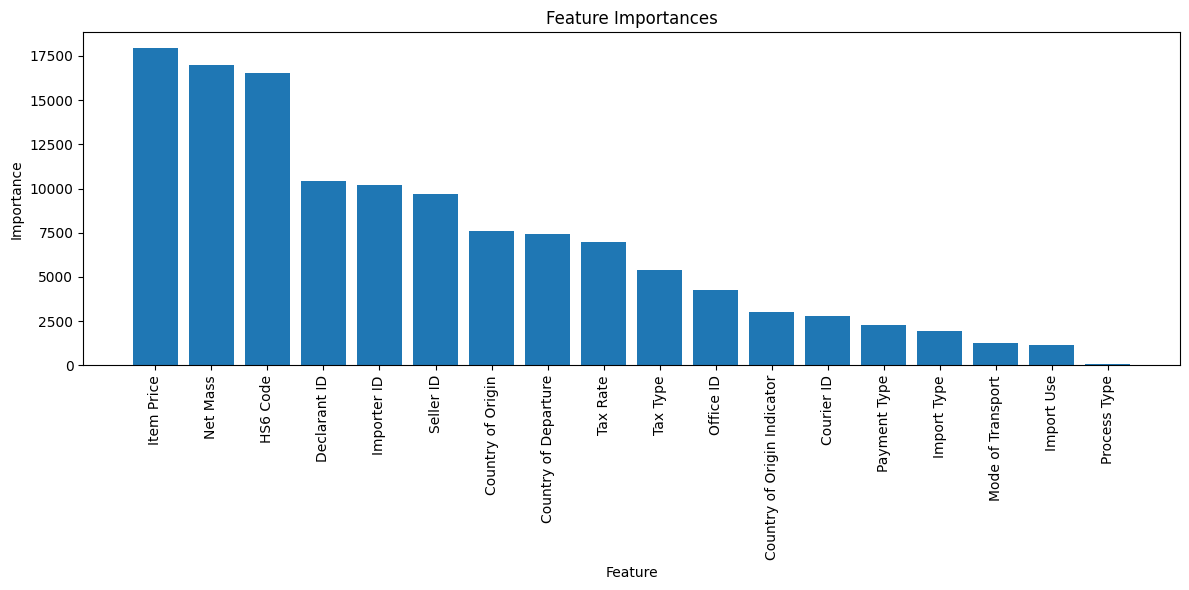

In [ ]:
model = train(LGBMClassifier, X_train=X_train_over, y_train=y_train_over)
evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_over, y_train=y_train_over)

In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 93.81546134663343%
None
recall@0.1: 45.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      80.66          89.83
0.40      65.30          96.25
0.30      46.95          98.51
0.20      33.53          99.62


#### 10- KNeighborsClassifier

------------------------------ KNeighborsClassifier ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.8146230351450812
Test Accuracy: 0.6950994566030211
-------------------- Confusion Matrix --------------------


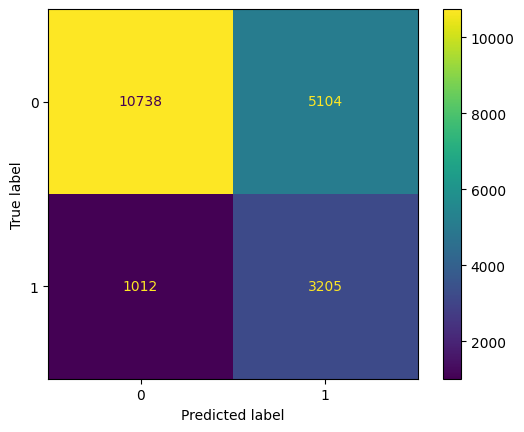


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.68      0.78     15842
           1       0.39      0.76      0.51      4217

    accuracy                           0.70     20059
   macro avg       0.65      0.72      0.65     20059
weighted avg       0.80      0.70      0.72     20059



In [ ]:
model = train(KNeighborsClassifier, X_train=X_train_over, y_train=y_train_over)
evaluation(model, X_test=X_test, y_test=y_test, X_train=X_train_over, y_train=y_train_over)

In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 70.87281795511223%
None
recall@0.1: 34.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      38.57          76.00
0.40      31.87          91.72
0.30      31.87          91.72
0.20      28.14          98.36


## Training without Over Sampler or SMOTE


#### 1- LogisticRegression

------------------------------ LogisticRegression ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.6132953880631055
Test Accuracy: 0.6218654967844858
-------------------- Confusion Matrix --------------------


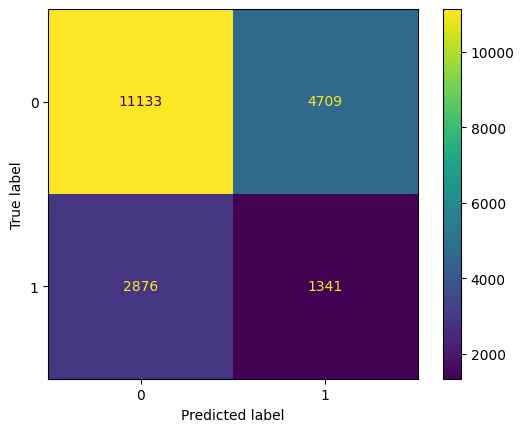


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.70      0.75     15842
           1       0.22      0.32      0.26      4217

    accuracy                           0.62     20059
   macro avg       0.51      0.51      0.50     20059
weighted avg       0.67      0.62      0.64     20059



In [ ]:
model = train(LogisticRegression)
evaluation(model)

In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 22.992518703241895%
None
recall@0.1: 11.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      22.17          31.80
0.40      21.02          99.95
0.30      21.02          100.00
0.20      21.02          100.00


#### 2- DecisionTreeClassifier

------------------------------ DecisionTreeClassifier ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 1.0
Test Accuracy: 0.9684430928760157
-------------------- Confusion Matrix --------------------


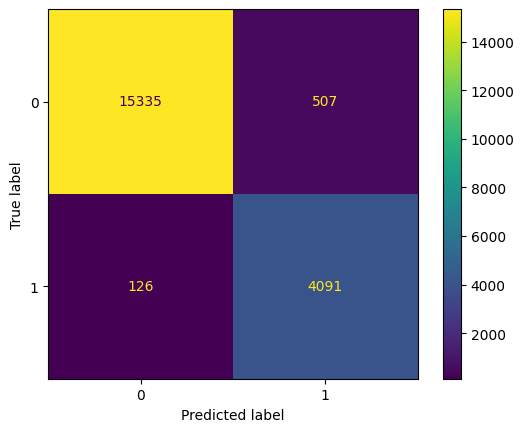


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     15842
           1       0.89      0.97      0.93      4217

    accuracy                           0.97     20059
   macro avg       0.94      0.97      0.95     20059
weighted avg       0.97      0.97      0.97     20059



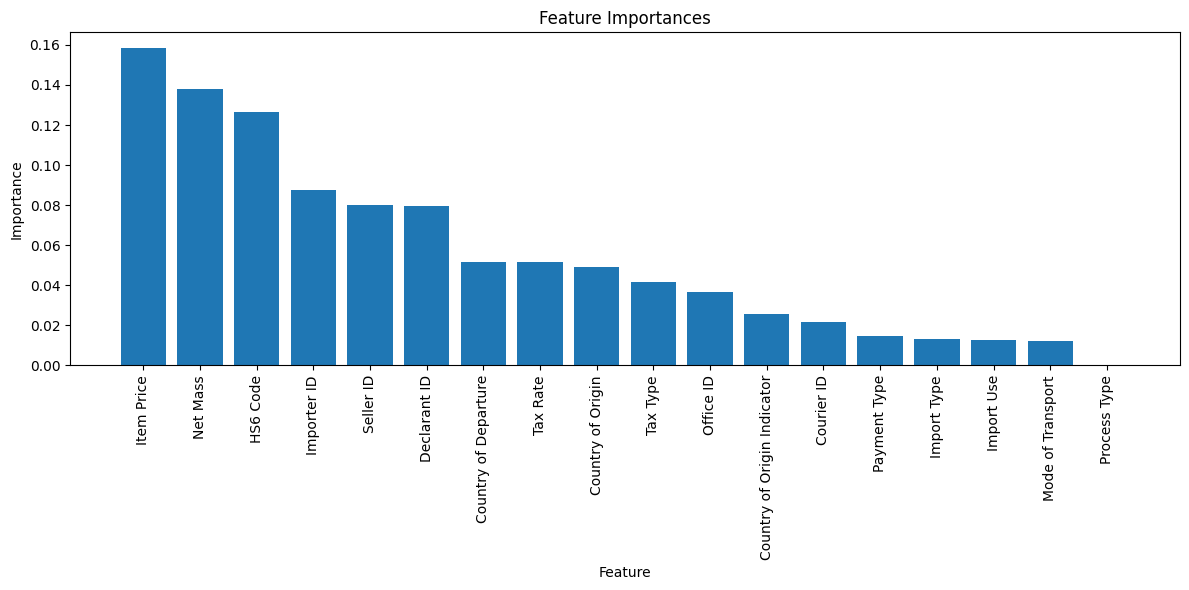

In [ ]:
model = train(DecisionTreeClassifier)
evaluation(model)

In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 100.0%
None
recall@0.1: 48.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      88.97          97.01
0.40      88.97          97.01
0.30      88.97          97.01
0.20      88.97          97.01


#### 3- RandomForestClassifier

------------------------------ RandomForestClassifier ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 1.0
Test Accuracy: 0.9838975023680143
-------------------- Confusion Matrix --------------------


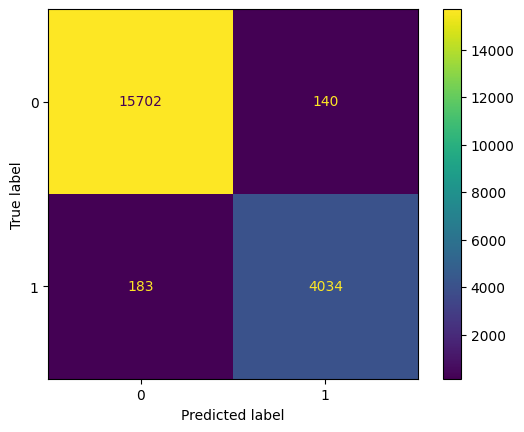


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     15842
           1       0.97      0.96      0.96      4217

    accuracy                           0.98     20059
   macro avg       0.98      0.97      0.98     20059
weighted avg       0.98      0.98      0.98     20059



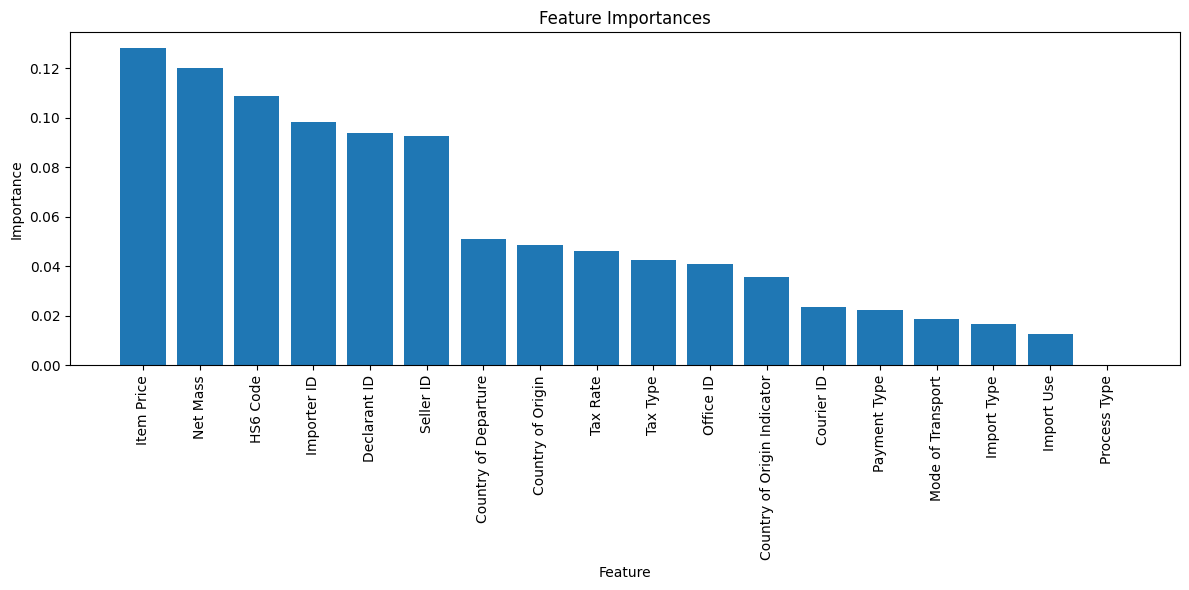

In [ ]:
model = train(RandomForestClassifier)
evaluation(model)


In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 100.0%
None
recall@0.1: 48.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      96.30          95.76
0.40      90.91          97.01
0.30      82.55          98.86
0.20      76.01          99.79


#### 4- GradientBoostingClassifier

------------------------------ GradientBoostingClassifier ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.7361944331512092
Test Accuracy: 0.7872775312827159
-------------------- Confusion Matrix --------------------


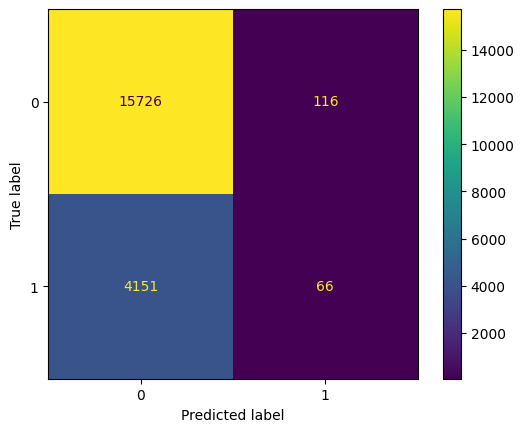


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88     15842
           1       0.36      0.02      0.03      4217

    accuracy                           0.79     20059
   macro avg       0.58      0.50      0.46     20059
weighted avg       0.70      0.79      0.70     20059



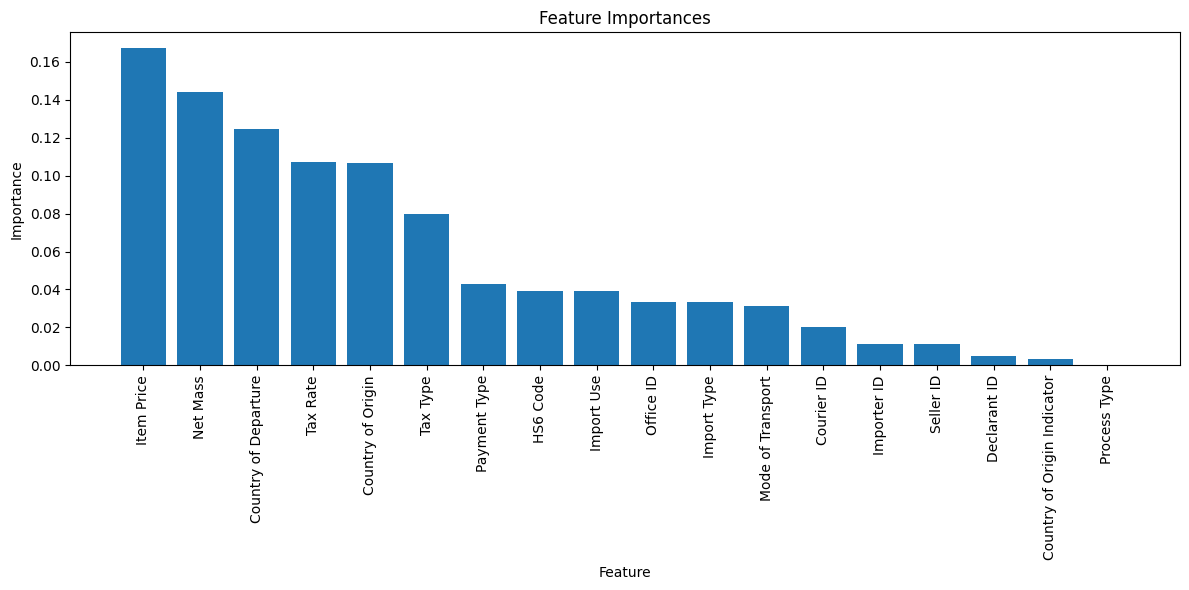

In [ ]:
model = train(GradientBoostingClassifier)
evaluation(model)


In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 32.86783042394015%
None
recall@0.1: 16.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      36.26          1.57
0.40      34.69          4.65
0.30      30.54          27.84
0.20      23.63          90.80


#### 5- XGBClassifier

------------------------------ XGBClassifier ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.7990123652661953
Test Accuracy: 0.8221745849743257
-------------------- Confusion Matrix --------------------


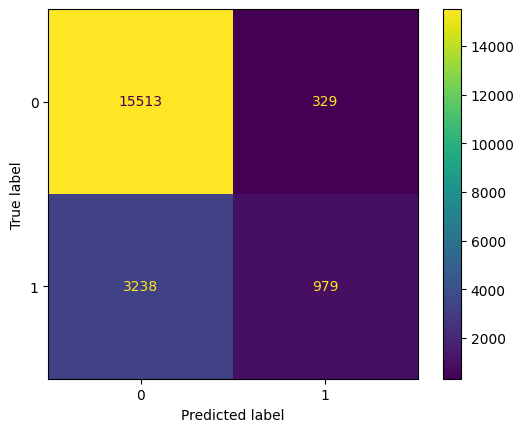


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90     15842
           1       0.75      0.23      0.35      4217

    accuracy                           0.82     20059
   macro avg       0.79      0.61      0.63     20059
weighted avg       0.81      0.82      0.78     20059



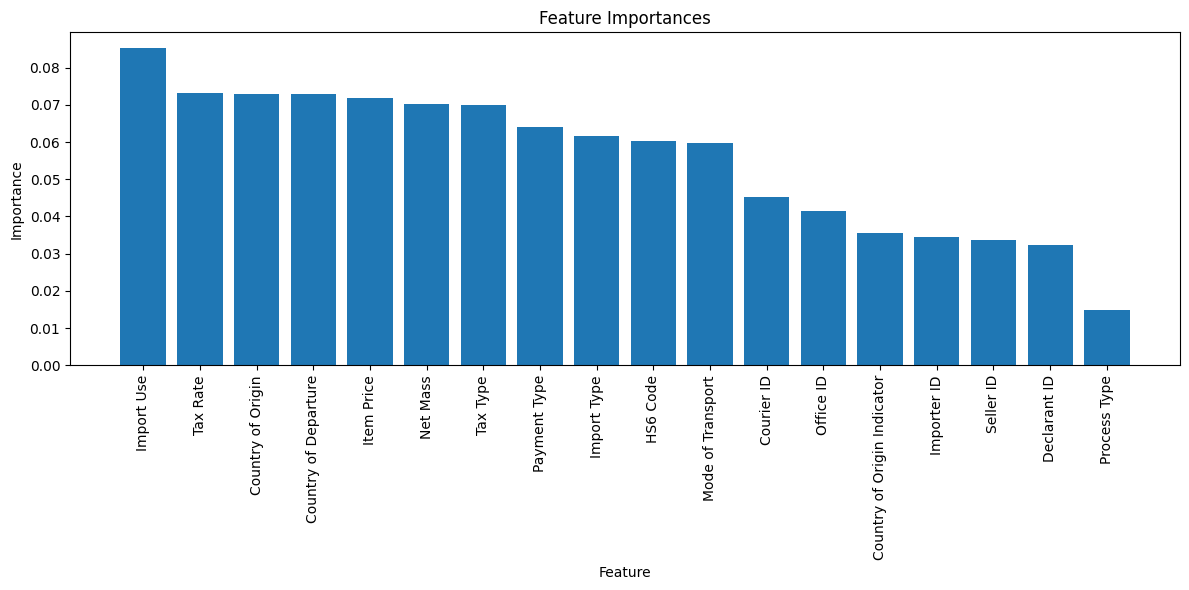

In [ ]:
model = train(XGBClassifier)
evaluation(model)

In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 71.87032418952619%
None
recall@0.1: 34.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      74.85          23.22
0.40      68.54          41.17
0.30      51.80          66.09
0.20      34.30          90.49


#### 6- SVM

In [ ]:
#model = train(SVC)
#evaluation(model)


In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 71.87032418952619%
None
recall@0.1: 34.0%
None


In [ ]:
# precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

#### 7- GaussianNB

------------------------------ GaussianNB ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.6812894781203209
Test Accuracy: 0.7101550426242584
-------------------- Confusion Matrix --------------------


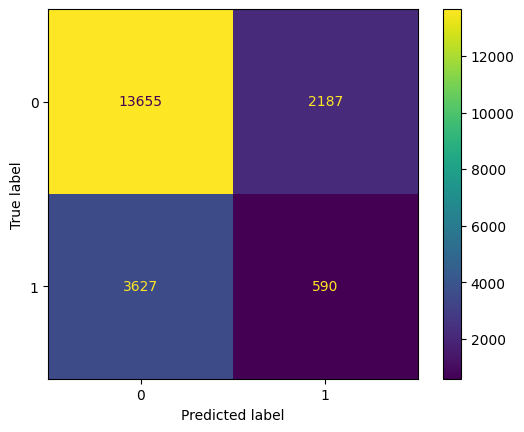


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82     15842
           1       0.21      0.14      0.17      4217

    accuracy                           0.71     20059
   macro avg       0.50      0.50      0.50     20059
weighted avg       0.67      0.71      0.69     20059



In [ ]:
model = train(GaussianNB)
evaluation(model)


In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 21.296758104738153%
None
recall@0.1: 10.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      21.25          13.99
0.40      21.80          16.10
0.30      21.35          18.80
0.20      21.59          24.83


#### 8- AdaBoostClassifier

------------------------------ AdaBoostClassifier ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.7331997977133677
Test Accuracy: 0.7861309138042774
-------------------- Confusion Matrix --------------------


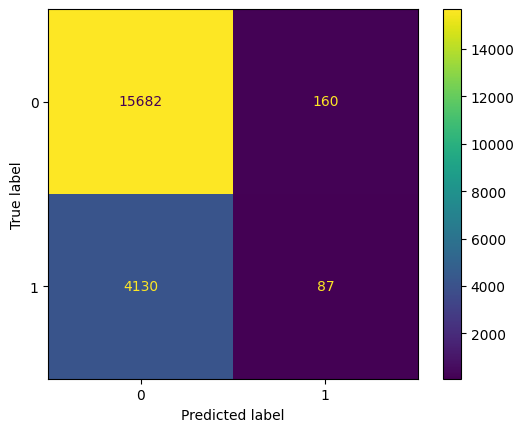


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88     15842
           1       0.35      0.02      0.04      4217

    accuracy                           0.79     20059
   macro avg       0.57      0.51      0.46     20059
weighted avg       0.70      0.79      0.70     20059



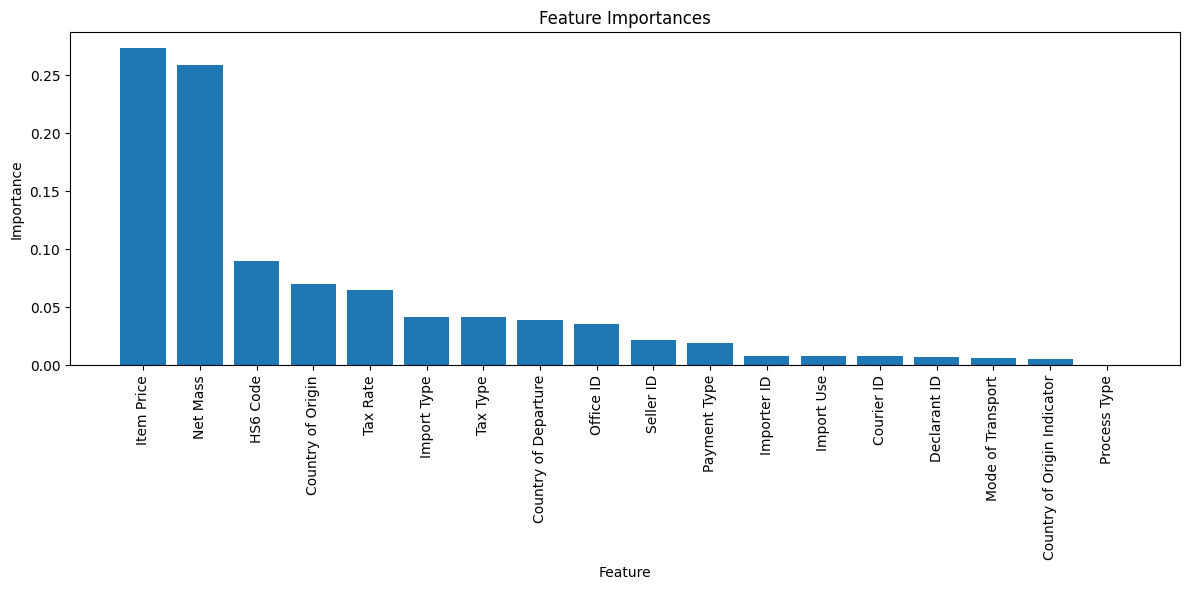

In [ ]:
model = train(AdaBoostClassifier)
evaluation(model)


In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 31.022443890274314%
None
recall@0.1: 15.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      35.22          2.06
0.40      24.54          85.44
0.30      21.17          99.95
0.20      21.09          100.00


#### 9- LGBMClassifier

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 27750, number of negative: 73097
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2106
[LightGBM] [Info] Number of data points in the train set: 100847, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275169 -> initscore=-0.968551
[LightGBM] [Info] Start training from score -0.968551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

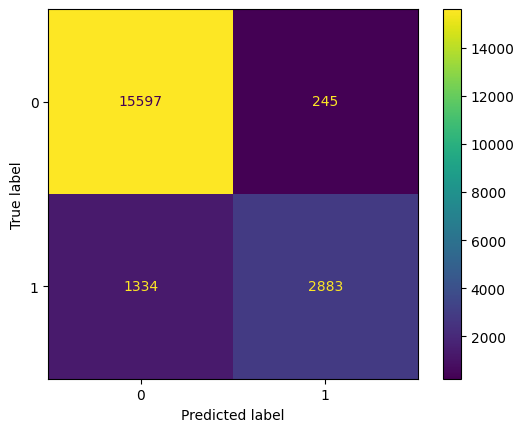


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     15842
           1       0.92      0.68      0.79      4217

    accuracy                           0.92     20059
   macro avg       0.92      0.83      0.87     20059
weighted avg       0.92      0.92      0.92     20059



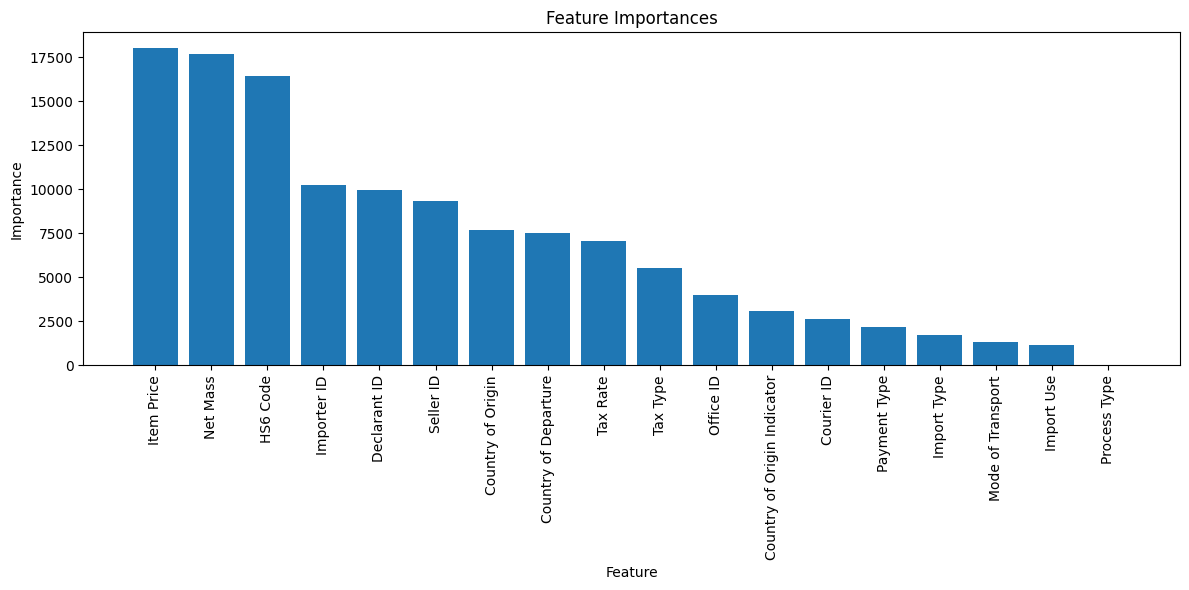

In [ ]:
model = train(LGBMClassifier)
evaluation(model)


In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 94.16458852867831%
None
recall@0.1: 45.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      92.17          68.37
0.40      88.86          83.78
0.30      79.00          93.41
0.20      55.96          98.13


#### 10- KNeighborsClassifier

------------------------------ KNeighborsClassifier ------------------------------
-------------------- Accuracy --------------------
Train Accuracy: 0.7822840540620941
Test Accuracy: 0.7824417966997358
-------------------- Confusion Matrix --------------------


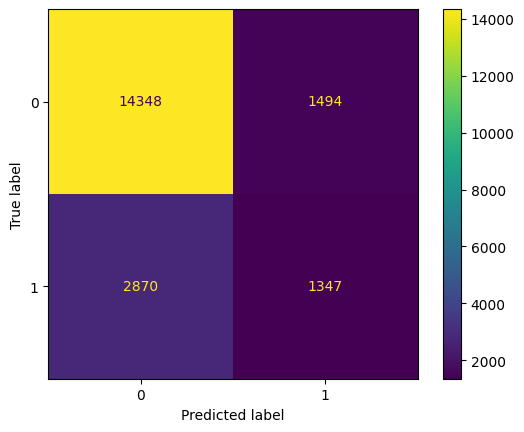


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87     15842
           1       0.47      0.32      0.38      4217

    accuracy                           0.78     20059
   macro avg       0.65      0.61      0.62     20059
weighted avg       0.76      0.78      0.77     20059



In [ ]:
model = train(KNeighborsClassifier)
evaluation(model)


In [ ]:
print(precision_at_n(X_test, y_test, model, n_percent=0.10))
print(recall_at_n(X_test, y_test, model, n_percent=0.10))

precision@0.1: 49.97506234413965%
None
recall@0.1: 24.0%
None


In [ ]:
precision_recall_by_threshold(X_test, y_test, model, thresholds=[0.5, 0.4, 0.3, 0.2])

Threshold Precision      Recall
-----------------------------------
0.50      47.41          31.94
0.40      36.13          67.01
0.30      36.13          67.01
0.20      28.14          98.36


#### Lazy Classifier

In [ ]:
#lazy_classifier = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

#models, predictions = lazy_classifier.fit(X_train, X_test, y_train, y_test)

